In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

print(" Libraries loaded successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

 Libraries loaded successfully!
Pandas version: 2.3.3
NumPy version: 2.4.1


In [2]:
print("=" * 80)
print("STEP 1: UNDERSTANDING THE DATASET")
print("=" * 80)

# Load the data
data_file = 'air_quality_data.csv'  # Update with your file name
df_full = pd.read_csv(data_file)

print(f"\n Dataset loaded from: {data_file}")
print("\n" + "="*80)
print("DATASET DIMENSIONS")
print("="*80)

# Total records (rows)
total_records = len(df_full)
print(f"\n Total Records (Rows): {total_records:,}")

# Total columns
total_columns = len(df_full.columns)
print(f" Total Columns: {total_columns}")

# Display column names
print(f"\n Column Names:")
for i, col in enumerate(df_full.columns, 1):
    print(f"  {i:2d}. {col}")

# Data types
print(f"\n Data Types:")
print(df_full.dtypes)

# Memory usage
memory_mb = df_full.memory_usage(deep=True).sum() / (1024**2)
print(f"\n Memory Usage: {memory_mb:.2f} MB")

print("\n" + "="*80)
print("FIRST 10 ROWS (HEAD) - Visual Inspection")
print("="*80)
print("\n Checking if display matches actual dataset...")
print(df_full.head(10))

print("\n" + "="*80)
print("LAST 10 ROWS (TAIL) - Completeness Check")
print("="*80)
print(df_full.tail(10))

print("\n" + "="*80)
print("RANDOM SAMPLE (5 rows) - Pattern Verification")
print("="*80)
print(df_full.sample(5))

print("\n STEP 1 COMPLETE: Dataset structure understood!")

STEP 1: UNDERSTANDING THE DATASET

 Dataset loaded from: air_quality_data.csv

DATASET DIMENSIONS

 Total Records (Rows): 5,617,325
 Total Columns: 15

 Column Names:
   1. Unnamed: 0
   2. CBSA Code
   3. Date
   4. AQI
   5. Category
   6. Defining Parameter
   7. Number of Sites Reporting
   8. city_ascii
   9. state_id
  10. state_name
  11. lat
  12. lng
  13. population
  14. density
  15. timezone

 Data Types:
Unnamed: 0                     int64
CBSA Code                      int64
Date                          object
AQI                            int64
Category                      object
Defining Parameter            object
Number of Sites Reporting      int64
city_ascii                    object
state_id                      object
state_name                    object
lat                          float64
lng                          float64
population                   float64
density                      float64
timezone                      object
dtype: object

 Memory 

In [4]:
print("=" * 80)
print("STEP 2: DATA QUALITY ASSESSMENT")
print("=" * 80)

print("\n" + "="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

# Count missing values
missing_counts = df_full.isnull().sum()
missing_percent = (missing_counts / len(df_full)) * 100

# Create summary dataframe
missing_summary = pd.DataFrame({
    'Column': df_full.columns,
    'Missing_Count': missing_counts.values,
    'Missing_Percent': missing_percent.values,
    'Data_Type': df_full.dtypes.values
})

# Sort by missing count
missing_summary = missing_summary.sort_values('Missing_Count', ascending=False)

print("\n Missing Values Summary:")
print(missing_summary.to_string(index=False))

# Identify columns with missing values
columns_with_missing = missing_summary[missing_summary['Missing_Count'] > 0]

if len(columns_with_missing) > 0:
    print(f"\n COLUMNS WITH MISSING VALUES: {len(columns_with_missing)}")
    print("\nDetails:")
    for _, row in columns_with_missing.iterrows():
        print(f"\n  • {row['Column']}:")
        print(f"    - Missing: {row['Missing_Count']:,} values ({row['Missing_Percent']:.2f}%)")
        
        # Find which rows have missing values
        missing_rows = df_full[df_full[row['Column']].isnull()].index.tolist()
        print(f"    - Row indices: {missing_rows[:10]}..." if len(missing_rows) > 10 else f"    - Row indices: {missing_rows}")
else:
    print("\n NO MISSING VALUES FOUND - Dataset is complete!")

# Visualize missing values
if len(columns_with_missing) > 0:
    plt.figure(figsize=(12, 6))
    plt.barh(columns_with_missing['Column'], columns_with_missing['Missing_Percent'], color='coral')
    plt.xlabel('Percentage of Missing Values (%)', fontsize=12)
    plt.ylabel('Column Name', fontsize=12)
    plt.title('Missing Values by Column', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

print("\n" + "="*80)
print("DUPLICATE ROWS ANALYSIS")
print("="*80)

duplicate_count = df_full.duplicated().sum()
print(f"\n Duplicate Rows: {duplicate_count:,}")

if duplicate_count > 0:
    print(f" WARNING: {duplicate_count} duplicate rows found")
    print("\nSample duplicate rows:")
    duplicates = df_full[df_full.duplicated(keep=False)]
    print(duplicates.head(10))
else:
    print(" No duplicate rows found!")

print("\n" + "="*80)
print("DATA TYPE VALIDATION")
print("="*80)

print("\n Column Data Types:")
type_summary = df_full.dtypes.value_counts()
print(type_summary)

print("\n Checking for data type issues...")

# Check if Date column is in correct format
if 'Date' in df_full.columns:
    print("\n• Date column:")
    print(f"  Current type: {df_full['Date'].dtype}")
    print(f"  Sample values: {df_full['Date'].head(3).tolist()}")
    
    # Try to identify format issues
    date_sample = df_full['Date'].astype(str)
    if date_sample.str.contains('#').any():
        problematic = date_sample[date_sample.str.contains('#', na=False)]
        print(f"   WARNING: {len(problematic)} dates contain '#' character (formatting issue)")
    else:
        print("   No obvious date formatting issues")

print("\n STEP 2 COMPLETE: Data quality assessed!")

STEP 2: DATA QUALITY ASSESSMENT

MISSING VALUES ANALYSIS

 Missing Values Summary:
                   Column  Missing_Count  Missing_Percent Data_Type
               Unnamed: 0              0             0.00     int64
                CBSA Code              0             0.00     int64
                     Date              0             0.00    object
                      AQI              0             0.00     int64
                 Category              0             0.00    object
       Defining Parameter              0             0.00    object
Number of Sites Reporting              0             0.00     int64
               city_ascii              0             0.00    object
                 state_id              0             0.00    object
               state_name              0             0.00    object
                      lat              0             0.00   float64
                      lng              0             0.00   float64
               population        

In [5]:
print("=" * 80)
print("STEP 2B: ADVANCED DATA QUALITY CHECK")
print("=" * 80)

print("\n Checking for hidden data quality issues beyond NULL values...")

print("\n" + "="*80)
print("CHECKING FOR PLACEHOLDER/ERROR VALUES")
print("="*80)

# Check for common problematic values
problematic_markers = ['#', '########', 'N/A', 'n/a', 'NA', 'null', 'NULL', 'None', 
                       'unknown', 'UNKNOWN', '-', '--', '?', '???']

issues_found = []

for col in df_full.columns:
    if df_full[col].dtype == 'object':  # Only check text columns
        for marker in problematic_markers:
            # Check if the marker appears in the column
            mask = df_full[col].astype(str).str.contains(marker, na=False, regex=False)
            count = mask.sum()
            
            if count > 0:
                issues_found.append({
                    'Column': col,
                    'Issue': f"Contains '{marker}'",
                    'Count': count,
                    'Percentage': (count / len(df_full)) * 100
                })

if len(issues_found) > 0:
    print(f"\n FOUND {len(issues_found)} DATA QUALITY ISSUES!")
    
    issues_df = pd.DataFrame(issues_found)
    issues_df = issues_df.sort_values('Count', ascending=False)
    
    print("\n Issues Summary:")
    print(issues_df.to_string(index=False))
    
    # Detailed analysis for each issue
    print("\n" + "="*80)
    print("DETAILED ANALYSIS OF EACH ISSUE")
    print("="*80)
    
    for _, issue in issues_df.iterrows():
        col = issue['Column']
        marker = issue['Issue'].split("'")[1]  # Extract marker
        
        print(f"\n Column: {col}")
        print(f"   Issue: {issue['Issue']}")
        print(f"   Count: {issue['Count']:,} ({issue['Percentage']:.2f}%)")
        
        # Find affected rows
        mask = df_full[col].astype(str).str.contains(marker, na=False, regex=False)
        affected_rows = df_full[mask]
        
        print(f"   Affected row indices: {affected_rows.index.tolist()[:10]}..." if len(affected_rows) > 10 
              else f"   Affected row indices: {affected_rows.index.tolist()}")
        
        # Show sample of problematic rows
        print(f"\n   Sample of affected rows:")
        sample_cols = ['Date', 'city_ascii', 'state_name', 'AQI', 'Category'] if col == 'Date' else [col, 'city_ascii', 'state_name']
        available_cols = [c for c in sample_cols if c in df_full.columns]
        print(affected_rows[available_cols].head(10))
        
        # Check if there's a pattern
        if 'city_ascii' in df_full.columns:
            cities_affected = affected_rows['city_ascii'].value_counts().head(5)
            print(f"\n   Top cities affected:")
            for city, count in cities_affected.items():
                print(f"     • {city}: {count} times")
        
        if 'state_name' in df_full.columns:
            states_affected = affected_rows['state_name'].value_counts().head(5)
            print(f"\n   Top states affected:")
            for state, count in states_affected.items():
                print(f"     • {state}: {count} times")
        
        if 'CBSA Code' in df_full.columns:
            cbsa_affected = affected_rows['CBSA Code'].value_counts().head(5)
            print(f"\n   Top CBSA codes affected:")
            for cbsa, count in cbsa_affected.items():
                print(f"     • {cbsa}: {count} times")

else:
    print("\n NO PLACEHOLDER/ERROR VALUES FOUND!")

print("\n" + "="*80)
print("CHECKING FOR IMPOSSIBLE/UNREALISTIC VALUES")
print("="*80)

# Check for unrealistic values in numeric columns
print("\n Checking numeric columns for outliers/impossible values...")

if 'AQI' in df_full.columns:
    print("\n• AQI Column:")
    print(f"  Range: {df_full['AQI'].min()} to {df_full['AQI'].max()}")
    print(f"  Expected range: 0 to 500 (EPA standard)")
    
    if df_full['AQI'].min() < 0:
        negative_count = (df_full['AQI'] < 0).sum()
        print(f"   WARNING: {negative_count} negative values (impossible!)")
    
    if df_full['AQI'].max() > 500:
        extreme_count = (df_full['AQI'] > 500).sum()
        print(f"   WARNING: {extreme_count} values > 500 (extremely rare!)")
        extreme_rows = df_full[df_full['AQI'] > 500]
        print(f"\n  Extreme AQI values:")
        print(extreme_rows[['Date', 'city_ascii', 'state_name', 'AQI', 'Defining Parameter', 'Category']].head())
    else:
        print(f"   All values within reasonable range")

if 'population' in df_full.columns:
    print("\n• Population Column:")
    print(f"  Range: {df_full['population'].min():,.0f} to {df_full['population'].max():,.0f}")
    
    if df_full['population'].min() <= 0:
        zero_pop = (df_full['population'] <= 0).sum()
        print(f"   WARNING: {zero_pop} cities with population ≤ 0 (impossible!)")
    else:
        print(f"   All values are positive")

if 'density' in df_full.columns:
    print("\n• Density Column:")
    print(f"  Range: {df_full['density'].min():.2f} to {df_full['density'].max():.2f} people/sq km")
    
    if df_full['density'].min() <= 0:
        zero_density = (df_full['density'] <= 0).sum()
        print(f"   WARNING: {zero_density} entries with density ≤ 0")
    else:
        print(f"   All values are positive")

print("\n" + "="*80)
print("DATA QUALITY SUMMARY")
print("="*80)

total_issues = len(issues_found)
total_rows = len(df_full)
affected_rows_count = sum(issue['Count'] for issue in issues_found)

print(f"\n Overall Data Quality:")
print(f"  • Total rows: {total_rows:,}")
print(f"  • Rows with NULL values: 0 (0.00%)")
print(f"  • Rows with placeholder values: {affected_rows_count:,} ({affected_rows_count/total_rows*100:.2f}%)")
print(f"  • Total issues found: {total_issues}")

if total_issues > 0:
    quality_score = ((total_rows - affected_rows_count) / total_rows) * 100
    print(f"\n   Data Quality Score: {quality_score:.2f}%")
    
    if quality_score >= 95:
        print(f"   EXCELLENT quality")
    elif quality_score >= 90:
        print(f"   GOOD quality (minor issues)")
    elif quality_score >= 80:
        print(f"   FAIR quality (some issues to address)")
    else:
        print(f"   POOR quality (significant issues)")
else:
    print(f"\n   Data Quality Score: 100%")
    print(f"   EXCELLENT - No issues found!")

print("\n STEP 2B COMPLETE: Advanced data quality check finished!")

STEP 2B: ADVANCED DATA QUALITY CHECK

 Checking for hidden data quality issues beyond NULL values...

CHECKING FOR PLACEHOLDER/ERROR VALUES

 FOUND 1 DATA QUALITY ISSUES!

 Issues Summary:
Column        Issue   Count  Percentage
  Date Contains '-' 5617325      100.00

DETAILED ANALYSIS OF EACH ISSUE

 Column: Date
   Issue: Contains '-'
   Count: 5,617,325 (100.00%)
   Affected row indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]...

   Sample of affected rows:
         Date city_ascii  state_name  AQI Category
0  2022-01-01   Aberdeen  Washington   21     Good
1  2022-01-02   Aberdeen  Washington   12     Good
2  2022-01-03   Aberdeen  Washington   18     Good
3  2022-01-04   Aberdeen  Washington   19     Good
4  2022-01-05   Aberdeen  Washington   17     Good
5  2022-01-06   Aberdeen  Washington   15     Good
6  2022-01-07   Aberdeen  Washington   20     Good
7  2022-01-08   Aberdeen  Washington   13     Good
8  2022-01-09   Aberdeen  Washington   16     Good
9  2022-01-10   Aberdeen  Washin

In [6]:
print("=" * 80)
print("STEP 2C: CORRECTED DATA QUALITY CHECK")
print("=" * 80)

print("\n Re-examining data quality with proper criteria...")

print("\n" + "="*80)
print("1. DATE COLUMN - PROPER VALIDATION")
print("="*80)

# Check if dates are actually problematic (not just containing dashes)
date_col = df_full['Date'].astype(str)

# Check for the ACTUAL problematic markers from your screenshot
actual_problems = date_col.str.contains('#{2,}', regex=True, na=False)  # Two or more # in a row
problem_count = actual_problems.sum()

print(f"\n Date Column Analysis:")
print(f"  • Total dates: {len(date_col):,}")
print(f"  • Format: YYYY-MM-DD (standard ISO format)")
print(f"  • Sample dates: {date_col.head(5).tolist()}")

if problem_count > 0:
    print(f"\n   Dates with '###' placeholder: {problem_count:,} ({problem_count/len(date_col)*100:.2f}%)")
    
    # Show affected rows
    problematic_dates = df_full[actual_problems]
    print("\n  Sample of problematic dates:")
    print(problematic_dates[['Date', 'city_ascii', 'state_name', 'AQI']].head(20))
else:
    print(f"\n   All dates are properly formatted!")
    print(f"   No '########' placeholders found")

# Try to convert to datetime to verify validity
print("\n Testing date conversion...")
try:
    df_full['Date_converted'] = pd.to_datetime(df_full['Date'], errors='coerce')
    failed_conversions = df_full['Date_converted'].isnull().sum()
    
    if failed_conversions > 0:
        print(f"   {failed_conversions:,} dates failed conversion ({failed_conversions/len(df_full)*100:.2f}%)")
        failed_rows = df_full[df_full['Date_converted'].isnull()]
        print("\n  Failed date examples:")
        print(failed_rows[['Date', 'city_ascii', 'state_name']].head(10))
    else:
        print(f"   All {len(df_full):,} dates successfully converted!")
        print(f"  • Date range: {df_full['Date_converted'].min()} to {df_full['Date_converted'].max()}")
        print(f"  • Time span: {(df_full['Date_converted'].max() - df_full['Date_converted'].min()).days} days")
    
    # Clean up temporary column
    df_full = df_full.drop('Date_converted', axis=1)
    
except Exception as e:
    print(f"   Error during conversion: {e}")

print("\n" + "="*80)
print("2. AQI EXTREME VALUES - DETAILED ANALYSIS")
print("="*80)

# Analyze the extreme AQI values
extreme_threshold = 500
extreme_aqi = df_full[df_full['AQI'] > extreme_threshold]

print(f"\n AQI Values > {extreme_threshold}:")
print(f"  • Count: {len(extreme_aqi):,} ({len(extreme_aqi)/len(df_full)*100:.2f}%)")
print(f"  • Highest AQI: {df_full['AQI'].max():,}")

if len(extreme_aqi) > 0:
    print(f"\n   Statistics for extreme values:")
    print(f"    • Mean: {extreme_aqi['AQI'].mean():.2f}")
    print(f"    • Median: {extreme_aqi['AQI'].median():.2f}")
    print(f"    • Range: {extreme_aqi['AQI'].min()} to {extreme_aqi['AQI'].max()}")
    
    print(f"\n   Breakdown by pollutant:")
    param_breakdown = extreme_aqi['Defining Parameter'].value_counts()
    for param, count in param_breakdown.items():
        print(f"    • {param}: {count} times")
    
    print(f"\n   Top affected states:")
    state_breakdown = extreme_aqi['state_name'].value_counts().head(10)
    for state, count in state_breakdown.items():
        print(f"    • {state}: {count} times")
    
    print(f"\n   Top affected cities:")
    city_breakdown = extreme_aqi['city_ascii'].value_counts().head(10)
    for city, count in city_breakdown.items():
        state = extreme_aqi[extreme_aqi['city_ascii'] == city]['state_name'].iloc[0]
        print(f"    • {city}, {state}: {count} times")
    
    print(f"\n   When do extreme values occur?")
    # Try to analyze temporal patterns
    try:
        extreme_aqi_temp = extreme_aqi.copy()
        extreme_aqi_temp['Date_temp'] = pd.to_datetime(extreme_aqi_temp['Date'], errors='coerce')
        extreme_aqi_temp = extreme_aqi_temp.dropna(subset=['Date_temp'])
        
        if len(extreme_aqi_temp) > 0:
            extreme_aqi_temp['Month'] = extreme_aqi_temp['Date_temp'].dt.month
            extreme_aqi_temp['Year'] = extreme_aqi_temp['Date_temp'].dt.year
            
            monthly = extreme_aqi_temp['Month'].value_counts().sort_index()
            print(f"\n    By month:")
            month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
            for month, count in monthly.items():
                print(f"    • {month_names[month-1]}: {count} times")
    except:
        pass
    
    print(f"\n   Top 20 Most Extreme Events:")
    top_extreme = extreme_aqi.nlargest(20, 'AQI')[['Date', 'city_ascii', 'state_name', 'AQI', 'Defining Parameter', 'Category']]
    print(top_extreme.to_string(index=False))
    
    print(f"\n    Possible explanations:")
    print(f"    • Wildfires (especially in California)")
    print(f"    • Dust storms (especially PM10)")
    print(f"    • Data entry errors (extremely high values)")
    print(f"    • Different AQI calculation method")

print("\n" + "="*80)
print("3. COMPREHENSIVE DATA QUALITY SCORE")
print("="*80)

# Calculate a proper quality score
total_rows = len(df_full)
issues = []

# Check 1: Invalid dates
try:
    date_test = pd.to_datetime(df_full['Date'], errors='coerce')
    invalid_dates = date_test.isnull().sum()
    if invalid_dates > 0:
        issues.append(('Invalid dates', invalid_dates))
except:
    pass

# Check 2: Extreme AQI (might be valid but unusual)
extreme_aqi_count = (df_full['AQI'] > 500).sum()
if extreme_aqi_count > 0:
    issues.append(('AQI > 500 (extreme)', extreme_aqi_count))

# Check 3: Negative values
if (df_full['AQI'] < 0).sum() > 0:
    issues.append(('Negative AQI (impossible)', (df_full['AQI'] < 0).sum()))

# Check 4: Duplicate rows
duplicate_count = df_full.duplicated().sum()
if duplicate_count > 0:
    issues.append(('Duplicate rows', duplicate_count))

print(f"\n Data Quality Assessment:")
print(f"  • Total records: {total_rows:,}")
print(f"  • Records with issues: {sum(issue[1] for issue in issues):,}")

if len(issues) > 0:
    print(f"\n   Issues found:")
    for issue_name, issue_count in issues:
        percentage = (issue_count / total_rows) * 100
        print(f"    • {issue_name}: {issue_count:,} ({percentage:.2f}%)")
    
    # Calculate quality score (excluding extreme AQI as they might be valid)
    critical_issues = [count for name, count in issues if 'extreme' not in name.lower()]
    quality_score = ((total_rows - sum(critical_issues)) / total_rows) * 100
    
    print(f"\n   Data Quality Score: {quality_score:.2f}%")
    
    if quality_score >= 99:
        print(f"   EXCELLENT quality")
    elif quality_score >= 95:
        print(f"   VERY GOOD quality")
    elif quality_score >= 90:
        print(f"   GOOD quality")
    elif quality_score >= 80:
        print(f"   FAIR quality")
    else:
        print(f"   POOR quality")
else:
    print(f"\n   Data Quality Score: 100%")
    print(f"   EXCELLENT - No critical issues!")
    print(f"   Note: {extreme_aqi_count:,} extreme AQI values (>500) may warrant investigation")

print("\n STEP 2C COMPLETE: Accurate data quality assessment finished!")

STEP 2C: CORRECTED DATA QUALITY CHECK

 Re-examining data quality with proper criteria...

1. DATE COLUMN - PROPER VALIDATION

 Date Column Analysis:
  • Total dates: 5,617,325
  • Format: YYYY-MM-DD (standard ISO format)
  • Sample dates: ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05']

   All dates are properly formatted!
   No '########' placeholders found

 Testing date conversion...
   All 5,617,325 dates successfully converted!
  • Date range: 1980-01-01 00:00:00 to 2022-05-31 00:00:00
  • Time span: 15491 days

2. AQI EXTREME VALUES - DETAILED ANALYSIS

 AQI Values > 500:
  • Count: 409 (0.01%)
  • Highest AQI: 20,646

   Statistics for extreme values:
    • Mean: 1380.77
    • Median: 841.00
    • Range: 501 to 20646

   Breakdown by pollutant:
    • PM10: 386 times
    • PM2.5: 23 times

   Top affected states:
    • California: 210 times
    • Arizona: 67 times
    • New Mexico: 29 times
    • Missouri: 28 times
    • Nevada: 26 times
    • Oregon: 18 t

In [7]:
print("=" * 80)
print("STEP 3: SAMPLE SIZE DETERMINATION")
print("=" * 80)

print("\n FULL DATASET INFORMATION:")
print(f"  • Total Records: {len(df_full):,}")
print(f"  • Total Columns: {len(df_full.columns)}")
print(f"  • Memory Usage: {df_full.memory_usage(deep=True).sum() / (1024**2):.2f} MB")
print(f"  • Date Range: {df_full['Date'].min()} to {df_full['Date'].max()}")
print(f"  • Time Span: 42+ years (1980-2022)")

print("\n" + "="*80)
print("STATISTICAL SAMPLE SIZE CALCULATION")
print("="*80)

# Parameters for sample size calculation
total_population = len(df_full)
confidence_level = 0.95  # 95% confidence
margin_of_error = 0.01   # 1% margin of error (very precise)
z_score = 1.96           # Z-score for 95% confidence

print(f"\n Sample Size Parameters:")
print(f"  • Confidence Level: {confidence_level*100}%")
print(f"  • Margin of Error: {margin_of_error*100}%")
print(f"  • Z-Score: {z_score}")

# Calculate sample size using Cochran's formula
# n = (Z^2 * p * (1-p)) / e^2
# Where p = 0.5 (maximum variability - most conservative estimate)
p = 0.5
sample_size_infinite = (z_score**2 * p * (1-p)) / (margin_of_error**2)

# Adjust for finite population
sample_size_needed = sample_size_infinite / (1 + ((sample_size_infinite - 1) / total_population))
sample_size_needed = int(np.ceil(sample_size_needed))

print(f"\n CALCULATED SAMPLE SIZE:")
print(f"  • For infinite population: {int(sample_size_infinite):,}")
print(f"  • Adjusted for finite population: {sample_size_needed:,}")
print(f"  • This represents: {(sample_size_needed/total_population)*100:.2f}% of dataset")

print("\n" + "="*80)
print("DECISION: SAMPLE vs FULL DATASET")
print("="*80)

# Decision thresholds
if total_population <= 100000:
    decision = "FULL"
    reason = "Dataset is small enough for complete analysis"
    df = df_full.copy()
    using_sample = False
elif total_population <= 1000000:
    decision = "FULL (with caution)"
    reason = "Dataset is manageable but large - full analysis possible"
    df = df_full.copy()
    using_sample = False
else:
    # For very large datasets, use stratified sample
    decision = "STRATIFIED SAMPLE"
    reason = "Dataset is very large (5.6M rows) - using representative sample"
    using_sample = True
    
    # We'll create a stratified sample to ensure all categories are represented
    print(f"\n Creating stratified sample...")
    print(f"  Strategy: Sample proportionally from each state to maintain geographic distribution")
    
    # Calculate sample size per state
    state_proportions = df_full['state_name'].value_counts(normalize=True)
    
    # Sample from each state
    sampled_dfs = []
    for state, proportion in state_proportions.items():
        state_data = df_full[df_full['state_name'] == state]
        state_sample_size = int(sample_size_needed * proportion)
        
        # Ensure at least 100 samples per state (if state has enough data)
        state_sample_size = max(min(state_sample_size, len(state_data)), min(100, len(state_data)))
        
        if len(state_data) > 0:
            state_sample = state_data.sample(n=state_sample_size, random_state=42)
            sampled_dfs.append(state_sample)
    
    df = pd.concat(sampled_dfs, ignore_index=True)
    
    # Shuffle the combined sample
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\n DECISION: Use {decision}")
print(f"   Reason: {reason}")

print(f"\n WORKING DATASET:")
print(f"  • Rows: {len(df):,}")
print(f"  • Columns: {len(df.columns)}")
print(f"  • Memory: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")
print(f"  • Percentage of full data: {(len(df)/total_population)*100:.2f}%")

# Verify sample representativeness (if using sample)
if using_sample:
    print("\n" + "="*80)
    print("SAMPLE REPRESENTATIVENESS VERIFICATION")
    print("="*80)
    
    print("\n Comparing sample to full dataset...")
    
    # 1. Compare AQI statistics
    print("\n1️ AQI Distribution:")
    aqi_comparison = pd.DataFrame({
        'Metric': ['Mean', 'Median', 'Std Dev', 'Min', 'Max'],
        'Full_Dataset': [
            df_full['AQI'].mean(),
            df_full['AQI'].median(),
            df_full['AQI'].std(),
            df_full['AQI'].min(),
            df_full['AQI'].max()
        ],
        'Sample': [
            df['AQI'].mean(),
            df['AQI'].median(),
            df['AQI'].std(),
            df['AQI'].min(),
            df['AQI'].max()
        ]
    })
    aqi_comparison['Difference_%'] = ((aqi_comparison['Sample'] - aqi_comparison['Full_Dataset']) / 
                                       aqi_comparison['Full_Dataset'] * 100)
    print(aqi_comparison.round(2).to_string(index=False))
    
    # 2. Compare Category distribution
    print("\n2️ Category Distribution:")
    full_cat = df_full['Category'].value_counts(normalize=True).sort_index() * 100
    sample_cat = df['Category'].value_counts(normalize=True).sort_index() * 100
    
    cat_comparison = pd.DataFrame({
        'Category': full_cat.index,
        'Full_%': full_cat.values,
        'Sample_%': sample_cat.values,
        'Difference_%': (sample_cat.values - full_cat.values)
    })
    print(cat_comparison.round(2).to_string(index=False))
    
    # 3. Compare Defining Parameter distribution
    print("\n3️ Defining Parameter Distribution:")
    full_param = df_full['Defining Parameter'].value_counts(normalize=True).sort_index() * 100
    sample_param = df['Defining Parameter'].value_counts(normalize=True).sort_index() * 100
    
    param_comparison = pd.DataFrame({
        'Parameter': full_param.index,
        'Full_%': full_param.values,
        'Sample_%': sample_param.values,
        'Difference_%': (sample_param.values - full_param.values)
    })
    print(param_comparison.round(2).to_string(index=False))
    
    # 4. Compare State distribution
    print("\n4️ Top 10 States Distribution:")
    full_state = df_full['state_name'].value_counts(normalize=True).head(10) * 100
    sample_state = df['state_name'].value_counts(normalize=True).head(10) * 100
    
    state_comparison = pd.DataFrame({
        'State': full_state.index,
        'Full_%': full_state.values,
        'Sample_%': [sample_state.get(state, 0) for state in full_state.index],
    })
    state_comparison['Difference_%'] = state_comparison['Sample_%'] - state_comparison['Full_%']
    print(state_comparison.round(2).to_string(index=False))
    
    # Calculate overall representativeness score
    max_diff_cat = cat_comparison['Difference_%'].abs().max()
    max_diff_param = param_comparison['Difference_%'].abs().max()
    max_diff_aqi = aqi_comparison['Difference_%'].abs().max()
    
    avg_difference = (max_diff_cat + max_diff_param + max_diff_aqi) / 3
    
    print(f"\n REPRESENTATIVENESS SCORE:")
    print(f"  • Maximum category difference: {max_diff_cat:.2f}%")
    print(f"  • Maximum parameter difference: {max_diff_param:.2f}%")
    print(f"  • Maximum AQI difference: {max_diff_aqi:.2f}%")
    print(f"  • Average difference: {avg_difference:.2f}%")
    
    if avg_difference < 2:
        print(f"\n   EXCELLENT representativeness (avg diff < 2%)")
    elif avg_difference < 5:
        print(f"\n   GOOD representativeness (avg diff < 5%)")
    elif avg_difference < 10:
        print(f"\n   FAIR representativeness (avg diff < 10%)")
    else:
        print(f"\n   POOR representativeness (avg diff > 10%)")

else:
    print("\n Using FULL dataset - no sampling needed!")
    print("   All analysis will be on complete 5.6M records")

print("\n" + "="*80)
print("FINAL DECISION SUMMARY")
print("="*80)

print(f"\n Analysis will proceed with:")
print(f"  • Dataset size: {len(df):,} rows")
print(f"  • Columns: {len(df.columns)}")
print(f"  • Represents: {(len(df)/total_population)*100:.2f}% of full data")
print(f"  • Sample method: {'Stratified random sample' if using_sample else 'Full dataset'}")
print(f"  • Statistical validity: {'95% confidence, 1% margin of error' if using_sample else '100% (complete data)'}")

print("\n STEP 3 COMPLETE: Sample size determined!")
print(f"\n Ready to proceed with {len(df):,} rows for comprehensive analytics")

STEP 3: SAMPLE SIZE DETERMINATION

 FULL DATASET INFORMATION:
  • Total Records: 5,617,325
  • Total Columns: 15
  • Memory Usage: 2480.90 MB
  • Date Range: 1980-01-01 to 2022-05-31
  • Time Span: 42+ years (1980-2022)

STATISTICAL SAMPLE SIZE CALCULATION

 Sample Size Parameters:
  • Confidence Level: 95.0%
  • Margin of Error: 1.0%
  • Z-Score: 1.96

 CALCULATED SAMPLE SIZE:
  • For infinite population: 9,603
  • Adjusted for finite population: 9,588
  • This represents: 0.17% of dataset

DECISION: SAMPLE vs FULL DATASET

 Creating stratified sample...
  Strategy: Sample proportionally from each state to maintain geographic distribution

 DECISION: Use STRATIFIED SAMPLE
   Reason: Dataset is very large (5.6M rows) - using representative sample

 WORKING DATASET:
  • Rows: 10,154
  • Columns: 15
  • Memory: 4.49 MB
  • Percentage of full data: 0.18%

SAMPLE REPRESENTATIVENESS VERIFICATION

 Comparing sample to full dataset...

1️ AQI Distribution:
 Metric  Full_Dataset  Sample  Diffe

In [9]:
print("=" * 80)
print("STEP 3B: SAMPLE COVERAGE VERIFICATION")
print("=" * 80)

print("\n Checking if our 10,154-row sample captures ALL unique values...\n")

# Function to compare coverage
def check_coverage(column_name, show_details=True):
    full_unique = set(df_full[column_name].dropna().unique())
    sample_unique = set(df[column_name].dropna().unique())
    
    missing = full_unique - sample_unique
    coverage_percent = (len(sample_unique) / len(full_unique)) * 100 if len(full_unique) > 0 else 0
    
    print(f"\n{'='*80}")
    print(f"{column_name.upper()}")
    print(f"{'='*80}")
    print(f"   Full dataset unique values: {len(full_unique):,}")
    print(f"   Sample unique values: {len(sample_unique):,}")
    print(f"   Coverage: {coverage_percent:.2f}%")
    print(f"   Missing from sample: {len(missing):,}")
    
    if len(missing) > 0:
        print(f"\n   MISSING {len(missing)} unique values in sample")
        
        if show_details:
            if len(missing) <= 30:
                print(f"\n   All missing values (with frequency in full dataset):")
                for item in sorted(missing):
                    count_in_full = (df_full[column_name] == item).sum()
                    percent_in_full = (count_in_full / len(df_full)) * 100
                    print(f"     • {item}: {count_in_full:,} times ({percent_in_full:.4f}%)")
            else:
                print(f"\n   Top 30 missing values by frequency:")
                missing_counts = df_full[df_full[column_name].isin(missing)][column_name].value_counts().head(30)
                for item, count in missing_counts.items():
                    percent = (count / len(df_full)) * 100
                    print(f"     • {item}: {count:,} times ({percent:.4f}%)")
                print(f"\n     ... and {len(missing) - 30} more rare values")
    else:
        print(f"   ALL unique values captured in sample!")
    
    return coverage_percent, len(missing), len(full_unique), len(sample_unique)

# Store results
coverage_results = {}

print("\n" + "="*80)
print("CHECKING COVERAGE FOR EACH VARIABLE")
print("="*80)

# ============================================================================
# 1. CATEGORIES (Should be 100% - only 6 categories)
# ============================================================================
cov, miss, full_count, sample_count = check_coverage('Category', show_details=True)
coverage_results['Category'] = {
    'Coverage_%': cov, 
    'Missing': miss, 
    'Full_Unique': full_count, 
    'Sample_Unique': sample_count
}

# ============================================================================
# 2. DEFINING PARAMETERS (Should be 100% - only 5 parameters)
# ============================================================================
cov, miss, full_count, sample_count = check_coverage('Defining Parameter', show_details=True)
coverage_results['Defining Parameter'] = {
    'Coverage_%': cov, 
    'Missing': miss, 
    'Full_Unique': full_count, 
    'Sample_Unique': sample_count
}

# ============================================================================
# 3. STATES (Should be 100% - stratified by state)
# ============================================================================
cov, miss, full_count, sample_count = check_coverage('state_name', show_details=True)
coverage_results['State Name'] = {
    'Coverage_%': cov, 
    'Missing': miss, 
    'Full_Unique': full_count, 
    'Sample_Unique': sample_count
}

# ============================================================================
# 4. STATE IDs (Should match states)
# ============================================================================
cov, miss, full_count, sample_count = check_coverage('state_id', show_details=True)
coverage_results['State ID'] = {
    'Coverage_%': cov, 
    'Missing': miss, 
    'Full_Unique': full_count, 
    'Sample_Unique': sample_count
}

# ============================================================================
# 5. CITIES (Will likely have missing values - many rare cities)
# ============================================================================
cov, miss, full_count, sample_count = check_coverage('city_ascii', show_details=True)
coverage_results['City'] = {
    'Coverage_%': cov, 
    'Missing': miss, 
    'Full_Unique': full_count, 
    'Sample_Unique': sample_count
}

# ============================================================================
# 6. TIMEZONES (Should be 100% - only 9 timezones)
# ============================================================================
cov, miss, full_count, sample_count = check_coverage('timezone', show_details=True)
coverage_results['Timezone'] = {
    'Coverage_%': cov, 
    'Missing': miss, 
    'Full_Unique': full_count, 
    'Sample_Unique': sample_count
}

# ============================================================================
# 7. NUMBER OF SITES (Many values, may miss some rare ones)
# ============================================================================
cov, miss, full_count, sample_count = check_coverage('Number of Sites Reporting', show_details=True)
coverage_results['Sites Reporting'] = {
    'Coverage_%': cov, 
    'Missing': miss, 
    'Full_Unique': full_count, 
    'Sample_Unique': sample_count
}

# ============================================================================
# COVERAGE SUMMARY TABLE
# ============================================================================
print("\n" + "="*80)
print("COVERAGE SUMMARY TABLE")
print("="*80)

summary_df = pd.DataFrame.from_dict(coverage_results, orient='index')
summary_df = summary_df.sort_values('Coverage_%', ascending=False)
print("\n" + summary_df.to_string())

# ============================================================================
# OVERALL ASSESSMENT
# ============================================================================
print("\n" + "="*80)
print("OVERALL COVERAGE ASSESSMENT")
print("="*80)

complete_coverage = sum(1 for v in coverage_results.values() if v['Missing'] == 0)
partial_coverage = len(coverage_results) - complete_coverage

print(f"\n Coverage Statistics:")
print(f"  • Variables checked: {len(coverage_results)}")
print(f"  • Variables with 100% coverage: {complete_coverage}")
print(f"  • Variables with partial coverage: {partial_coverage}")

avg_coverage = sum(v['Coverage_%'] for v in coverage_results.values()) / len(coverage_results)
print(f"  • Average coverage: {avg_coverage:.2f}%")

# Identify critical vs non-critical missing values
critical_vars = ['Category', 'Defining Parameter', 'State Name', 'State ID', 'Timezone']
critical_missing = sum(1 for var in critical_vars if coverage_results.get(var, {}).get('Missing', 0) > 0)

print(f"\n Critical Variables (Category, Parameter, State, Timezone):")
print(f"  • Variables with 100% coverage: {len(critical_vars) - critical_missing}/{len(critical_vars)}")

if critical_missing == 0:
    print(f"   ALL critical variables fully captured!")
else:
    print(f"   {critical_missing} critical variables have missing values!")

# ============================================================================
# RECOMMENDATION
# ============================================================================
print("\n" + "="*80)
print("RECOMMENDATION")
print("="*80)

total_missing = sum(v['Missing'] for v in coverage_results.values())

if total_missing == 0:
    print("\n PERFECT COVERAGE!")
    print("   • Sample captures ALL unique values")
    print("   • Safe to proceed with current sample")
    print("   • Analysis will be representative")
    recommendation = "KEEP_SAMPLE"
    
elif critical_missing == 0 and avg_coverage >= 95:
    print("\n EXCELLENT COVERAGE!")
    print(f"   • All critical variables captured (Category, Parameter, State)")
    print(f"   • {total_missing} missing values are rare/non-critical (cities, site counts)")
    print(f"   • Average coverage: {avg_coverage:.2f}%")
    print("\n    You have two good options:")
    print("   1.  KEEP SAMPLE (10,154 rows) - Fast, representative, good for initial analysis")
    print("   2.  USE FULL DATASET (5.6M rows) - Complete, captures rare events")
    recommendation = "EITHER"
    
elif critical_missing == 0:
    print("\n GOOD COVERAGE with limitations")
    print(f"   • All critical variables captured")
    print(f"   • Missing {total_missing} non-critical unique values")
    print(f"   • Average coverage: {avg_coverage:.2f}%")
    print("\n    Recommendation: INCREASE SAMPLE SIZE or use FULL DATASET")
    recommendation = "INCREASE_OR_FULL"
    
else:
    print("\n INSUFFICIENT COVERAGE!")
    print(f"   • {critical_missing} critical variables missing values")
    print(f"   • Total missing: {total_missing} unique values")
    print("\n    Recommendation: USE FULL DATASET (5.6M rows)")
    recommendation = "FULL_REQUIRED"

print("\n" + "="*80)
print("NEXT STEPS")
print("="*80)

if recommendation == "KEEP_SAMPLE":
    print("\n Proceed with current sample (10,154 rows)")
    print("   Ready for Step 4: Comprehensive Analytics")
    
elif recommendation == "EITHER":
    print("\n DECISION TIME - Choose one option:")
    print("\n   Option A: KEEP CURRENT SAMPLE (Recommended for initial exploration)")
    print("   ---------")
    print("   df = df  # Keep current 10,154 rows")
    print("   Pros: Fast processing, all major categories covered")
    print("   Cons: Missing some rare cities and site counts")
    print("   Best for: Learning, initial EDA, quick insights")
    
    print("\n   Option B: SWITCH TO FULL DATASET (Recommended for complete analysis)")
    print("   ---------")
    print("   df = df_full.copy()  # Use all 5.6M rows")
    print("   Pros: 100% coverage, capture rare events, complete historical data")
    print("   Cons: Slower processing (but manageable)")
    print("   Best for: Final analysis, thesis/portfolio work, publication")
    
elif recommendation == "INCREASE_OR_FULL":
    print("\n INCREASE SAMPLE SIZE:")
    print("   df = df_full.sample(n=50000, random_state=42)")
    print("\n   OR USE FULL DATASET:")
    print("   df = df_full.copy()")
    
else:  # FULL_REQUIRED
    print("\n MUST use full dataset:")
    print("   df = df_full.copy()")

print("\n STEP 3B COMPLETE: Coverage verification finished!")
print("\n Current working dataset: {:,} rows".format(len(df)))

STEP 3B: SAMPLE COVERAGE VERIFICATION

 Checking if our 10,154-row sample captures ALL unique values...


CHECKING COVERAGE FOR EACH VARIABLE

CATEGORY
   Full dataset unique values: 6
   Sample unique values: 6
   Coverage: 100.00%
   Missing from sample: 0
   ALL unique values captured in sample!

DEFINING PARAMETER
   Full dataset unique values: 5
   Sample unique values: 5
   Coverage: 100.00%
   Missing from sample: 0
   ALL unique values captured in sample!

STATE_NAME
   Full dataset unique values: 52
   Sample unique values: 52
   Coverage: 100.00%
   Missing from sample: 0
   ALL unique values captured in sample!

STATE_ID
   Full dataset unique values: 52
   Sample unique values: 52
   Coverage: 100.00%
   Missing from sample: 0
   ALL unique values captured in sample!

CITY_ASCII
   Full dataset unique values: 614
   Sample unique values: 568
   Coverage: 92.51%
   Missing from sample: 46

   MISSING 46 unique values in sample

   Top 30 missing values by frequency:
     • F

In [15]:
print("=" * 80)
print("STEP 3C: SWITCHING TO FULL DATASET")
print("=" * 80)

print("\n DECISION: Use FULL DATASET for complete analysis")
print("\nReasons:")
print("  1.  100% coverage of all variables")
print("  2.  Capture rare cities and extreme events")
print("  3.  Complete 42-year historical analysis")
print("  4.  Better for learning and portfolio")
print("  5.  Manageable size (2.5 GB)")

# Switch to full dataset
df = df_full.copy()

print(f"\n NEW WORKING DATASET:")
print(f"  • Total Rows: {len(df):,}")
print(f"  • Total Columns: {len(df.columns)}")
print(f"  • Memory Usage: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")
print(f"  • Coverage: 100% of all data")

print(f"\n READY FOR ANALYSIS!")
print(f"  • All {len(df):,} records loaded")
print(f"  • All 614 cities included")
print(f"  • All 72 site count variations included")
print(f"  • Complete date range: 1980-2022")

print("\n STEP 3 COMPLETE: Using full dataset ({:,} rows)".format(len(df)))

STEP 3C: SWITCHING TO FULL DATASET

 DECISION: Use FULL DATASET for complete analysis

Reasons:
  1.  100% coverage of all variables
  2.  Capture rare cities and extreme events
  3.  Complete 42-year historical analysis
  4.  Better for learning and portfolio
  5.  Manageable size (2.5 GB)

 NEW WORKING DATASET:
  • Total Rows: 5,617,325
  • Total Columns: 15
  • Memory Usage: 2480.90 MB
  • Coverage: 100% of all data

 READY FOR ANALYSIS!
  • All 5,617,325 records loaded
  • All 614 cities included
  • All 72 site count variations included
  • Complete date range: 1980-2022

 STEP 3 COMPLETE: Using full dataset (5,617,325 rows)


In [16]:
print("=" * 80)
print("STEP 4: RELATIONSHIPS BETWEEN VARIABLES")
print("=" * 80)
print("Understanding how variables interact BEFORE detailed analytics")
print("=" * 80)

# ============================================================================
# QUESTION 1: When is category "Good"? At what AQI level?
# ============================================================================
print("\n" + "="*80)
print("Q1: WHEN IS THE CATEGORY 'GOOD'? AT WHAT AQI LEVEL?")
print("="*80)

print("\n AQI Ranges by Category (from actual data):")
category_aqi = df.groupby('Category')['AQI'].agg(['min', 'max', 'mean', 'median', 'count'])
category_aqi = category_aqi.sort_values('min')
print(category_aqi.round(2).to_string())

print("\n EPA OFFICIAL STANDARDS:")
print("""
Category                           AQI Range   Meaning
─────────────────────────────────────────────────────────────────
Good                               0-50        Air quality satisfactory
Moderate                           51-100      Acceptable for most people
Unhealthy for Sensitive Groups     101-150     Sensitive groups affected
Unhealthy                          151-200     Everyone may experience effects
Very Unhealthy                     201-300     Health alert
Hazardous                          301-500+    Emergency conditions
""")

print("\n ANSWER TO QUESTION 1:")
print("  Category = 'Good' when AQI is 0-50")
print("  Category = 'Moderate' when AQI is 51-100")
print("  Category = 'Unhealthy for Sensitive Groups' when AQI is 101-150")
print("  And so on...")

# Verify data matches EPA standards
print("\n Checking if data follows EPA standards:")
for category in ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']:
    if category in df['Category'].values:
        cat_data = df[df['Category'] == category]
        aqi_min = cat_data['AQI'].min()
        aqi_max = cat_data['AQI'].max()
        print(f"  • {category}: AQI {aqi_min}-{aqi_max}")

# ============================================================================
# QUESTION 2: Does Population/Density affect AQI?
# ============================================================================
print("\n" + "="*80)
print("Q2: DOES POPULATION/DENSITY AFFECT AQI?")
print("="*80)

# Calculate correlation
pop_aqi_corr = df['population'].corr(df['AQI'])
density_aqi_corr = df['density'].corr(df['AQI'])

print(f"\n Correlation Analysis:")
print(f"  • Population vs AQI correlation: {pop_aqi_corr:.4f}")
print(f"  • Density vs AQI correlation: {density_aqi_corr:.4f}")

print("\n Interpretation:")
if abs(pop_aqi_corr) < 0.3:
    print(f"  • Population: WEAK correlation ({pop_aqi_corr:.4f})")
    print(f"    → Population does NOT strongly affect AQI")
elif abs(pop_aqi_corr) < 0.7:
    print(f"  • Population: MODERATE correlation ({pop_aqi_corr:.4f})")
    print(f"    → Population has SOME effect on AQI")
else:
    print(f"  • Population: STRONG correlation ({pop_aqi_corr:.4f})")
    print(f"    → Population STRONGLY affects AQI")

if abs(density_aqi_corr) < 0.3:
    print(f"  • Density: WEAK correlation ({density_aqi_corr:.4f})")
    print(f"    → Density does NOT strongly affect AQI")
elif abs(density_aqi_corr) < 0.7:
    print(f"  • Density: MODERATE correlation ({density_aqi_corr:.4f})")
    print(f"    → Density has SOME effect on AQI")
else:
    print(f"  • Density: STRONG correlation ({density_aqi_corr:.4f})")
    print(f"    → Density STRONGLY affects AQI")

# Group analysis
print("\n Average AQI by Population Size:")
pop_bins = [0, 50000, 100000, 500000, 1000000, 20000000]
pop_labels = ['<50K', '50K-100K', '100K-500K', '500K-1M', '>1M']
df['pop_group'] = pd.cut(df['population'], bins=pop_bins, labels=pop_labels)
pop_aqi_avg = df.groupby('pop_group', observed=True)['AQI'].agg(['mean', 'median', 'count'])
print(pop_aqi_avg.round(2).to_string())

print("\n Average AQI by Density:")
density_bins = [0, 200, 500, 1000, 2000, 20000]
density_labels = ['<200', '200-500', '500-1K', '1K-2K', '>2K']
df['density_group'] = pd.cut(df['density'], bins=density_bins, labels=density_labels)
density_aqi_avg = df.groupby('density_group', observed=True)['AQI'].agg(['mean', 'median', 'count'])
print(density_aqi_avg.round(2).to_string())

print("\n ANSWER TO QUESTION 2:")
if abs(pop_aqi_corr) < 0.1 and abs(density_aqi_corr) < 0.1:
    print("  Population and Density have MINIMAL effect on AQI")
    print("  Other factors (weather, geography, industry) are more important")
else:
    print("  Population/Density show SOME relationship with AQI")
    print("  But correlation is not very strong")

# ============================================================================
# QUESTION 3: Does Timezone affect AQI?
# ============================================================================
print("\n" + "="*80)
print("Q3: DOES TIMEZONE AFFECT AQI?")
print("="*80)

print("\n Average AQI by Timezone:")
timezone_aqi = df.groupby('timezone')['AQI'].agg(['mean', 'median', 'min', 'max', 'count'])
timezone_aqi = timezone_aqi.sort_values('mean', ascending=False)
print(timezone_aqi.round(2).to_string())

print("\n ANSWER TO QUESTION 3:")
print("  Timezone itself doesn't CAUSE AQI changes")
print("  BUT: Different timezones = different geographic regions")
print("  Geographic regions have different:")
print("    • Climate patterns (dry West vs humid East)")
print("    • Industrial activities")
print("    • Natural features (mountains, deserts, oceans)")
print("  So: Timezone is a PROXY for geography, not a direct cause")

# ============================================================================
# QUESTION 4: Does State affect AQI?
# ============================================================================
print("\n" + "="*80)
print("Q4: DOES STATE AFFECT AQI?")
print("="*80)

print("\n AQI Statistics by State:")
state_aqi = df.groupby('state_name')['AQI'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])
state_aqi = state_aqi.sort_values('mean', ascending=False)

print("\n Top 10 States with HIGHEST Average AQI:")
print(state_aqi.head(10).round(2).to_string())

print("\n Top 10 States with LOWEST Average AQI:")
print(state_aqi.tail(10).round(2).to_string())

# Calculate variance between states
overall_mean = df['AQI'].mean()
state_variance = state_aqi['mean'].var()
print(f"\n Variance in state averages: {state_variance:.2f}")

print("\n ANSWER TO QUESTION 4:")
print("  YES! State SIGNIFICANTLY affects AQI")
print("  States vary greatly due to:")
print("    • Geography (deserts, mountains, coasts)")
print("    • Climate (dry vs humid)")
print("    • Industry (manufacturing, mining, agriculture)")
print("    • Population density")
print("    • Environmental regulations")
print("    • Natural events (wildfires, dust storms)")

# ============================================================================
# QUESTION 5: Does Number of Sites affect AQI?
# ============================================================================
print("\n" + "="*80)
print("Q5: DO NUMBER OF REPORTING SITES AFFECT AQI?")
print("="*80)

# Correlation
sites_aqi_corr = df['Number of Sites Reporting'].corr(df['AQI'])
print(f"\n Correlation: {sites_aqi_corr:.4f}")

print("\n Average AQI by Number of Sites:")
sites_aqi = df.groupby('Number of Sites Reporting')['AQI'].agg(['mean', 'median', 'count'])
sites_aqi = sites_aqi[sites_aqi['count'] >= 100]  # Only sites with enough data
print(sites_aqi.head(20).round(2).to_string())

print("\n ANSWER TO QUESTION 5:")
print("  Number of sites does NOT affect AQI itself")
print("  BUT: More sites = more accurate measurements")
print("  Areas with worse air quality often have MORE monitoring")
print("  So correlation might exist, but it's not causal")
print("  More sites → better data quality, not higher/lower AQI")

# ============================================================================
# QUESTION 6: Does AQI affect Defining Parameter (or vice versa)?
# ============================================================================
print("\n" + "="*80)
print("Q6: DOES AQI AFFECT DEFINING PARAMETER? OR VICE VERSA?")
print("="*80)

print("\n AQI Statistics by Pollutant:")
param_aqi = df.groupby('Defining Parameter')['AQI'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])
param_aqi = param_aqi.sort_values('mean', ascending=False)
print(param_aqi.round(2).to_string())

print("\n Category Distribution by Pollutant:")
param_category = pd.crosstab(df['Defining Parameter'], df['Category'], normalize='index') * 100
print(param_category.round(2).to_string())

print("\n ANSWER TO QUESTION 6:")
print("  The Defining Parameter DETERMINES the AQI!")
print("  Here's how it works:")
print("    1. Each pollutant (PM2.5, Ozone, etc.) is measured")
print("    2. Each measurement is converted to an AQI value")
print("    3. The pollutant with the HIGHEST AQI becomes the 'Defining Parameter'")
print("    4. That highest AQI is reported for that day/location")
print("\n  So: Defining Parameter → AQI (not the other way around)")
print("  Different pollutants cause different AQI patterns:")
print("    • PM10 causes the HIGHEST extreme values (dust storms)")
print("    • Ozone typically moderate (summer smog)")
print("    • CO typically low (good emission controls)")

# ============================================================================
# QUESTION 7: Has TIME affected AQI/Population/Density?
# ============================================================================
print("\n" + "="*80)
print("Q7: HAS TIME AFFECTED AQI/POPULATION/DENSITY?")
print("="*80)

# Convert dates (if not already done)
if 'Date_dt' not in df.columns:
    df['Date_dt'] = pd.to_datetime(df['Date'], errors='coerce')
if 'Year' not in df.columns:
    df['Year'] = df['Date_dt'].dt.year

print("\n Average AQI by Year:")
yearly_aqi = df.groupby('Year')['AQI'].agg(['mean', 'median', 'count'])
yearly_aqi = yearly_aqi[yearly_aqi['count'] >= 1000]  # Only years with enough data

print("\n First 10 years:")
print(yearly_aqi.head(10).round(2).to_string())

print("\n Last 10 years:")
print(yearly_aqi.tail(10).round(2).to_string())

# Trend analysis
if len(yearly_aqi) > 2:
    first_year_aqi = yearly_aqi.head(5)['mean'].mean()
    last_year_aqi = yearly_aqi.tail(5)['mean'].mean()
    change = last_year_aqi - first_year_aqi
    percent_change = (change / first_year_aqi) * 100
    
    print(f"\n Temporal Trend:")
    print(f"  • Average AQI in first 5 years: {first_year_aqi:.2f}")
    print(f"  • Average AQI in last 5 years: {last_year_aqi:.2f}")
    print(f"  • Change: {change:+.2f} ({percent_change:+.2f}%)")

print("\n ANSWER TO QUESTION 7:")
print("  TIME has affected air quality over 42 years!")
print("  Typical patterns:")
print("    • 1980s-1990s: Generally worse air quality")
print("    • 2000s-2020s: Improvement due to:")
print("      - Clean Air Act regulations")
print("      - Better vehicle emission standards")
print("      - Industrial pollution controls")
print("    • BUT: Recent increases due to wildfires")
print("\n  Population has INCREASED over time (urban growth)")
print("  Density has INCREASED in major cities")

# ============================================================================
# QUESTION 8: Does Geographic Location affect AQI? (FIXED)
# ============================================================================
print("\n" + "="*80)
print("Q8: DOES GEOGRAPHIC LOCATION (LAT/LNG) AFFECT AQI?")
print("="*80)

# Correlation
lat_aqi_corr = df['lat'].corr(df['AQI'])
lng_aqi_corr = df['lng'].corr(df['AQI'])

print(f"\n Correlation Analysis:")
print(f"  • Latitude vs AQI: {lat_aqi_corr:.4f}")
print(f"  • Longitude vs AQI: {lng_aqi_corr:.4f}")

# Regional analysis - FIXED
print("\n Average AQI by Latitude (North-South):")
lat_bins = [0, 30, 35, 40, 45, 90]
lat_labels = ['Far South (<30°)', 'South (30-35°)', 'Mid (35-40°)', 'North (40-45°)', 'Far North (>45°)']
df['lat_group'] = pd.cut(df['lat'], bins=lat_bins, labels=lat_labels)
lat_aqi_avg = df.groupby('lat_group', observed=True)['AQI'].agg(['mean', 'median', 'count'])
print(lat_aqi_avg.round(2).to_string())

print("\n Average AQI by Longitude (West-East):")
lng_bins = [-180, -120, -105, -95, -80, 0]
lng_labels = ['West Coast', 'Mountain West', 'Great Plains', 'Midwest/South', 'East Coast']
df['lng_group'] = pd.cut(df['lng'], bins=lng_bins, labels=lng_labels)
lng_aqi_avg = df.groupby('lng_group', observed=True)['AQI'].agg(['mean', 'median', 'count'])
print(lng_aqi_avg.round(2).to_string())

print("\n Average AQI by City (Top 10 best & worst):")
city_aqi = df.groupby('city_ascii')['AQI'].agg(['mean', 'count'])
city_aqi = city_aqi[city_aqi['count'] >= 1000]  # Cities with enough data

print("\n Top 10 Cities with HIGHEST Average AQI:")
print(city_aqi.nlargest(10, 'mean').round(2).to_string())

print("\n Top 10 Cities with LOWEST Average AQI:")
print(city_aqi.nsmallest(10, 'mean').round(2).to_string())

print("\n ANSWER TO QUESTION 8:")
print("  YES! Geographic location STRONGLY affects AQI")
print("\n  Patterns observed:")
print("    • West Coast (CA, NV, AZ): HIGHER AQI")
print("      - Wildfires, deserts, dust storms")
print("    • Mountain West: VARIABLE")
print("      - Altitude, wildfires, mining")
print("    • Great Plains: LOWER AQI")
print("      - Rural, fewer sources, wind dispersion")
print("    • East Coast: MODERATE")
print("      - Urban pollution, humidity")
print("\n  Geographic factors:")
print("    • Topography (valleys trap pollution)")
print("    • Climate (dry = dust, humid = dispersal)")
print("    • Natural features (deserts, forests, oceans)")
print("    • Prevailing winds")
print("    • Distance from industrial areas")

# ============================================================================
# SUMMARY OF ALL RELATIONSHIPS
# ============================================================================
print("\n" + "="*80)
print("SUMMARY: RELATIONSHIPS BETWEEN VARIABLES")
print("="*80)

print("""
┌─────────────────────────────────────────────────────────────────────────┐
│                    RELATIONSHIP SUMMARY                                  │
└─────────────────────────────────────────────────────────────────────────┘

1. AQI → Category: DIRECT DETERMINISTIC 
   AQI value DIRECTLY determines category (0-50=Good, 51-100=Moderate, etc.)
    Data perfectly matches EPA standards!

2. Population/Density → AQI: WEAK POSITIVE 
   Correlation: ~0.20 (population), ~0.14 (density)
   Larger cities have SLIGHTLY higher AQI
   But many other factors more important
   Example: >1M cities avg 65 AQI vs <50K cities avg 39 AQI

3. Timezone → AQI: INDIRECT (PROXY) 
   Timezone = geographic region
   Different regions have different pollution sources
   Phoenix timezone highest, Alaska/Hawaii lowest

4. State → AQI: STRONG 
   Huge variance between states!
   Due to: geography, climate, industry, regulations
   DC/California worst, Hawaii/Idaho best

5. Number of Sites → AQI: WEAK POSITIVE (r=0.26) 
   More sites = better monitoring, NOT cause of high AQI
   Areas with problems often have MORE monitoring
   Correlation exists but NOT causal

6. Defining Parameter → AQI: DIRECT DETERMINISTIC 
   The pollutant CREATES the AQI value
   PM10 causes highest extremes (20,646!)
   Ozone typically moderate (52 avg)
   CO typically low (38 avg)

7. Time → AQI: STRONG IMPROVEMENT 
   1980s avg: ~54 AQI
   2020s avg: ~41 AQI
   IMPROVEMENT: -14 points (-26%!)
   Clean Air Act regulations working! 

8. Geography (Lat/Lng) → AQI: MODERATE 
   Weak direct correlation (r=-0.08 lat, r=0.00 lng)
   BUT: Regional patterns clear
   West drier/dustier = higher AQI
   Plains/rural = lower AQI

┌─────────────────────────────────────────────────────────────────────────┐
│                    KEY INSIGHTS                                          │
└─────────────────────────────────────────────────────────────────────────┘

STRONGEST PREDICTORS OF AQI:
  1. State/City (geography matters most!)
  2. Time period (huge improvement 1980→2022)
  3. Defining Parameter (which pollutant)
  4. Region (West vs East)
  5. Population size (weak effect)

 SURPRISING FINDINGS:
  • Population has WEAK effect - expected stronger!
  • Air quality IMPROVED 26% over 42 years! 
  • PM10 causes extremes but low average
  • More monitoring = worse areas (selection bias)
  • Geography > Population for air quality

 GEOGRAPHIC PATTERNS:
  • Dry West > Humid East (dust vs rain)
  • Valleys > Plains (pollution traps)
  • Urban > Rural (but not as much as expected!)
  • Coastal varies (wind helps, ports hurt)
""")

print("\n STEP 4 COMPLETE: All 8 fundamental relationships understood!")
print("\n KEY TAKEAWAY:")
print("   • Geography and pollutant type are STRONGEST factors")
print("   • Air quality has IMPROVED dramatically (1980→2022)")
print("   • Population matters less than expected!")


STEP 4: RELATIONSHIPS BETWEEN VARIABLES
Understanding how variables interact BEFORE detailed analytics

Q1: WHEN IS THE CATEGORY 'GOOD'? AT WHAT AQI LEVEL?

 AQI Ranges by Category (from actual data):
                                min    max   mean  median    count
Category                                                          
Good                              0     50  32.59   34.00  3939742
Moderate                         51    100  66.93   64.00  1375385
Unhealthy for Sensitive Groups  101    150 119.52  116.00   219344
Unhealthy                       151    200 168.01  164.00    65035
Very Unhealthy                  201    300 220.70  213.00    16939
Hazardous                       301  20646 848.29  475.50      880

 EPA OFFICIAL STANDARDS:

Category                           AQI Range   Meaning
─────────────────────────────────────────────────────────────────
Good                               0-50        Air quality satisfactory
Moderate                           51-100  

In [14]:
print("=" * 80)
print("STEP 4B: ADVANCED RELATIONSHIP QUESTIONS")
print("=" * 80)
print("Exploring deeper patterns and interactions")
print("=" * 80)

# ============================================================================
# Q9: Do certain pollutants dominate in specific geographic regions?
# ============================================================================
print("\n" + "="*80)
print("Q9: DO CERTAIN POLLUTANTS DOMINATE IN SPECIFIC REGIONS?")
print("="*80)

print("\n Dominant Pollutant by Region:")
regional_pollutants = pd.crosstab(df['lng_group'], df['Defining Parameter'], normalize='index') * 100
print(regional_pollutants.round(2).to_string())

print("\n Dominant Pollutant by State (Top 10 states):")
top_states = df['state_name'].value_counts().head(10).index
state_pollutants = pd.crosstab(
    df[df['state_name'].isin(top_states)]['state_name'], 
    df[df['state_name'].isin(top_states)]['Defining Parameter'],
    normalize='index'
) * 100
print(state_pollutants.round(2).to_string())

print("\n INSIGHT:")
print("  • West Coast: More PM10 (dust) and Ozone (summer heat)")
print("  • Midwest: More Ozone (agriculture, summer)")
print("  • East Coast: More PM2.5 (vehicles, industry)")
print("  • Rural areas: More Ozone (natural + agriculture)")

# ============================================================================
# Q10: Is there a seasonal pattern in air quality?
# ============================================================================
print("\n" + "="*80)
print("Q10: IS THERE A SEASONAL PATTERN IN AIR QUALITY?")
print("="*80)

df['Month'] = df['Date_dt'].dt.month
df['Season'] = df['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

print("\n Average AQI by Month:")
monthly_aqi = df.groupby('Month')['AQI'].agg(['mean', 'median', 'count'])
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_aqi.index = [month_names[i-1] for i in monthly_aqi.index]
print(monthly_aqi.round(2).to_string())

print("\n Average AQI by Season:")
seasonal_aqi = df.groupby('Season')['AQI'].agg(['mean', 'median', 'count'])
print(seasonal_aqi.round(2).to_string())

print("\n Dominant Pollutant by Season:")
season_pollutants = pd.crosstab(df['Season'], df['Defining Parameter'], normalize='index') * 100
print(season_pollutants.round(2).to_string())

print("\n INSIGHT:")
print("  Summer likely has:")
print("    • Higher Ozone (heat + sunlight)")
print("    • More wildfires (PM2.5, PM10)")
print("  Winter likely has:")
print("    • More PM2.5 (heating, inversions)")
print("    • Lower Ozone (less sunlight)")

# ============================================================================
# Q11: Do weekdays vs weekends show different air quality?
# ============================================================================
print("\n" + "="*80)
print("Q11: DO WEEKDAYS VS WEEKENDS SHOW DIFFERENT AIR QUALITY?")
print("="*80)

df['DayOfWeek'] = df['Date_dt'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6])

print("\n Average AQI by Day Type:")
day_type_aqi = df.groupby('IsWeekend')['AQI'].agg(['mean', 'median', 'count'])
day_type_aqi.index = ['Weekday', 'Weekend']
print(day_type_aqi.round(2).to_string())

print("\n Average AQI by Day of Week:")
day_aqi = df.groupby('DayOfWeek')['AQI'].agg(['mean', 'median', 'count'])
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_aqi.index = [day_names[i] for i in day_aqi.index]
print(day_aqi.round(2).to_string())

print("\n INSIGHT:")
print("  Weekend effect (if exists) suggests:")
print("    • Less commuter traffic = lower pollution")
print("    • Or: More weekend activities = higher pollution")

# ============================================================================
# Q12: Are extreme AQI events clustered in time or space?
# ============================================================================
print("\n" + "="*80)
print("Q12: ARE EXTREME AQI EVENTS CLUSTERED IN TIME OR SPACE?")
print("="*80)

extreme_threshold = 150  # Unhealthy and above
extreme_events = df[df['AQI'] > extreme_threshold]

print(f"\n Extreme Events (AQI > {extreme_threshold}):")
print(f"  • Total extreme events: {len(extreme_events):,}")
print(f"  • Percentage of dataset: {len(extreme_events)/len(df)*100:.2f}%")

print("\n Top 10 Cities with Most Extreme Events:")
extreme_cities = extreme_events['city_ascii'].value_counts().head(10)
for city, count in extreme_cities.items():
    state = extreme_events[extreme_events['city_ascii'] == city]['state_name'].iloc[0]
    print(f"  • {city}, {state}: {count:,} extreme events")

print("\n Top 10 Years with Most Extreme Events:")
extreme_years = extreme_events['Year'].value_counts().head(10)
for year, count in extreme_years.items():
    print(f"  • {int(year)}: {count:,} extreme events")

print("\n Extreme Events by Month:")
extreme_months = extreme_events['Month'].value_counts().sort_index()
for month, count in extreme_months.items():
    print(f"  • {month_names[int(month)-1]}: {count:,} events")

print("\n INSIGHT:")
print("  • Extreme events are NOT random")
print("  • Clustered in specific cities (Bishop, Phoenix)")
print("  • Seasonal patterns (spring dust storms, summer wildfires)")
print("  • Some years worse than others (wildfire years)")

# ============================================================================
# Q13: Does air quality improve or worsen over the lifespan of monitoring?
# ============================================================================
print("\n" + "="*80)
print("Q13: LONG-TERM TRENDS - IS AIR QUALITY IMPROVING?")
print("="*80)

# Decade analysis
df['Decade'] = (df['Year'] // 10) * 10

print("\n Average AQI by Decade:")
decade_aqi = df.groupby('Decade')['AQI'].agg(['mean', 'median', 'count'])
decade_aqi = decade_aqi[decade_aqi['count'] >= 1000]
print(decade_aqi.round(2).to_string())

# Trend test
if len(decade_aqi) >= 3:
    decades = decade_aqi.index.values
    means = decade_aqi['mean'].values
    
    # Simple linear trend
    from scipy import stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(decades, means)
    
    print(f"\n Trend Analysis:")
    print(f"  • Slope: {slope:.4f} AQI points per decade")
    print(f"  • R-squared: {r_value**2:.4f}")
    print(f"  • P-value: {p_value:.4f}")
    
    if p_value < 0.05:
        if slope < 0:
            print(f"   IMPROVING: AQI decreasing by {abs(slope):.2f} points/decade (significant)")
        else:
            print(f"   WORSENING: AQI increasing by {slope:.2f} points/decade (significant)")
    else:
        print(f"   NO SIGNIFICANT TREND detected")

print("\n INSIGHT:")
print("  Expected: Improvement 1980-2010 (Clean Air Act)")
print("  Possible: Recent increase 2010-2020 (wildfires)")

# ============================================================================
# Q14: Do adjacent states have similar air quality?
# ============================================================================
print("\n" + "="*80)
print("Q14: DO NEARBY STATES HAVE SIMILAR AIR QUALITY?")
print("="*80)

# Example: Compare states in same region
regions = {
    'West Coast': ['California', 'Oregon', 'Washington'],
    'Southwest': ['Arizona', 'New Mexico', 'Nevada', 'Utah'],
    'Midwest': ['Illinois', 'Indiana', 'Ohio', 'Michigan', 'Wisconsin'],
    'Northeast': ['New York', 'Pennsylvania', 'Massachusetts', 'New Jersey'],
    'South': ['Texas', 'Louisiana', 'Mississippi', 'Alabama', 'Georgia']
}

print("\n Average AQI by Region:")
for region_name, states in regions.items():
    region_data = df[df['state_name'].isin(states)]
    if len(region_data) > 0:
        avg_aqi = region_data['AQI'].mean()
        print(f"  • {region_name}: {avg_aqi:.2f}")

print("\n INSIGHT:")
print("  • Adjacent states often share:")
print("    - Similar climate/geography")
print("    - Pollution that crosses borders")
print("    - But industrial/regulatory differences matter")

# ============================================================================
# Q15: Is there a relationship between AQI and the number of "Good" days?
# ============================================================================
print("\n" + "="*80)
print("Q15: WHICH CITIES HAVE THE MOST 'GOOD' AIR QUALITY DAYS?")
print("="*80)

city_good_days = df[df['Category'] == 'Good'].groupby('city_ascii').size()
city_total_days = df.groupby('city_ascii').size()
city_good_percent = (city_good_days / city_total_days * 100).sort_values(ascending=False)

print("\n Top 10 Cities with Highest % of 'Good' Days:")
for city, percent in city_good_percent.head(10).items():
    state = df[df['city_ascii'] == city]['state_name'].iloc[0]
    total = city_total_days[city]
    print(f"  • {city}, {state}: {percent:.1f}% ({total:,} total days)")

print("\n Top 10 Cities with Lowest % of 'Good' Days:")
cities_with_data = city_good_percent[city_total_days >= 100]  # At least 100 days of data
for city, percent in cities_with_data.tail(10).items():
    state = df[df['city_ascii'] == city]['state_name'].iloc[0]
    total = city_total_days[city]
    print(f"  • {city}, {state}: {percent:.1f}% ({total:,} total days)")

# ============================================================================
# Q16: Do multiple pollutants correlate with each other?
# ============================================================================
print("\n" + "="*80)
print("Q16: WHEN ONE POLLUTANT IS HIGH, ARE OTHERS ALSO HIGH?")
print("="*80)

print("\n Co-occurrence of Pollutants:")
print("  Checking if multiple pollutants appear together on same dates...")

# For each city-date, what pollutants were measured?
# This is complex - simplified version:
pollutant_freq = df['Defining Parameter'].value_counts()
print("\n Pollutant Frequency:")
for pollutant, count in pollutant_freq.items():
    print(f"  • {pollutant}: {count:,} times ({count/len(df)*100:.2f}%)")

print("\n INSIGHT:")
print("  • Each reading reports ONE 'worst' pollutant")
print("  • But multiple pollutants measured simultaneously")
print("  • When PM2.5 is high, other particulates often high too")
print("  • When Ozone high (summer), PM often lower (different sources)")

# ============================================================================
# Q17: Does distance from coast affect air quality?
# ============================================================================
print("\n" + "="*80)
print("Q17: DOES PROXIMITY TO COAST AFFECT AIR QUALITY?")
print("="*80)

# Coastal states (simplified)
coastal_states = ['California', 'Oregon', 'Washington', 'Florida', 'Georgia', 
                  'North Carolina', 'South Carolina', 'Virginia', 'Maryland',
                  'New York', 'Massachusetts', 'Maine', 'Texas', 'Louisiana']

df['Is_Coastal'] = df['state_name'].isin(coastal_states)

print("\n Average AQI by Coastal vs Inland:")
coastal_aqi = df.groupby('Is_Coastal')['AQI'].agg(['mean', 'median', 'count'])
coastal_aqi.index = ['Inland', 'Coastal']
print(coastal_aqi.round(2).to_string())

print("\n INSIGHT:")
print("  • Coastal areas may have:")
print("    - Ocean breezes (disperse pollution)")
print("    - Higher humidity (affects particle formation)")
print("    - More population (more pollution)")
print("    - Port/shipping emissions")

# ============================================================================
# Q18: Are there "pollution hotspots" that persist over time?
# ============================================================================
print("\n" + "="*80)
print("Q18: ARE THERE PERSISTENT POLLUTION HOTSPOTS?")
print("="*80)

print("\n Cities Consistently in Top 10 Worst Air Quality:")
# For each year, find top 10 worst cities
yearly_worst = {}
for year in df['Year'].unique():
    if pd.notna(year):
        year_data = df[df['Year'] == year]
        city_yearly_aqi = year_data.groupby('city_ascii')['AQI'].mean()
        yearly_worst[int(year)] = set(city_yearly_aqi.nlargest(10).index)

# Find cities that appear in multiple years
from collections import Counter
all_worst_cities = []
for cities in yearly_worst.values():
    all_worst_cities.extend(cities)

persistent_worst = Counter(all_worst_cities).most_common(10)

print("\n Cities appearing most often in yearly 'Top 10 Worst':")
for city, years_count in persistent_worst:
    state = df[df['city_ascii'] == city]['state_name'].iloc[0]
    avg_aqi = df[df['city_ascii'] == city]['AQI'].mean()
    print(f"  • {city}, {state}: {years_count} years in top 10 (avg AQI: {avg_aqi:.1f})")

print("\n INSIGHT:")
print("  • Some cities have CHRONIC air quality problems")
print("  • Due to: geography (valleys), climate (dry), industry")
print("  • These need targeted interventions")

# ============================================================================
# SUMMARY: Additional Questions Answered
# ============================================================================
print("\n" + "="*80)
print("SUMMARY: ADDITIONAL RELATIONSHIPS DISCOVERED")
print("="*80)

print("""
┌─────────────────────────────────────────────────────────────────────────┐
│              10 NEW INSIGHTS FROM ADVANCED ANALYSIS                      │
└─────────────────────────────────────────────────────────────────────────┘

9.  REGIONAL POLLUTANT PATTERNS:
    • West: PM10 (dust) dominant
    • East: PM2.5 (vehicles) more common
    • Everywhere: Ozone in summer

10. SEASONAL PATTERNS:
    • Summer: High Ozone (heat + sun)
    • Winter: High PM2.5 (heating + inversions)
    • Spring: PM10 (dust storms)
    • Fall: Variable

11. WEEKDAY/WEEKEND EFFECT:
    • Potential difference due to commuter traffic
    • [Results show actual pattern]

12. EXTREME EVENTS CLUSTERING:
    • NOT random - specific cities (Bishop, Phoenix)
    • Specific times (spring dust, summer fire)
    • Some years much worse

13. LONG-TERM TREND:
    • [Results show if improving or worsening]
    • Regulations vs recent wildfires

14. REGIONAL SIMILARITY:
    • Adjacent states often similar
    • Pollution crosses borders
    • But regulations matter

15. "GOOD" DAY FREQUENCY:
    • Some cities have >90% good days
    • Others struggle with chronic problems

16. POLLUTANT CO-OCCURRENCE:
    • Different pollutants = different sources
    • PM2.5 & PM10 often together
    • Ozone separate (photochemical)

17. COASTAL EFFECT:
    • Ocean breezes help disperse
    • But ports add emissions
    • [Results show net effect]

18. PERSISTENT HOTSPOTS:
    • Some cities always in "worst 10"
    • Need targeted interventions
    • Geography often the culprit
""")

print("\n STEP 4B COMPLETE: Advanced relationships explored!")

STEP 4B: ADVANCED RELATIONSHIP QUESTIONS
Exploring deeper patterns and interactions

Q9: DO CERTAIN POLLUTANTS DOMINATE IN SPECIFIC REGIONS?

 Dominant Pollutant by Region:
Defining Parameter   CO   NO2  Ozone  PM10  PM2.5
lng_group                                        
West Coast         9.83  5.36  44.18  5.98  34.64
Mountain West      8.95  5.17  45.48 18.63  21.77
Great Plains       4.08  6.83  51.75 11.57  25.77
Midwest/South      4.48  5.28  57.96  6.01  26.27
East Coast         5.76 10.28  58.92  4.23  20.81

 Dominant Pollutant by State (Top 10 states):
Defining Parameter    CO   NO2  Ozone  PM10  PM2.5
state_name                                        
California          2.86 10.60  67.49  3.30  15.74
Florida             3.38  1.72  65.62  4.73  24.56
Indiana             3.98  8.94  54.51  3.85  28.71
Michigan            5.20  4.15  61.13  5.35  24.17
North Carolina      7.80  0.67  56.44  3.60  31.49
Ohio                5.65  5.90  56.75 12.07  19.63
Pennsylvania        3.

STEP 5: DATA VISUALIZATIONS
Creating 12 professional visualizations

 Preparing data for visualizations...
 Data preparation complete!
 Visualization setup complete!
 Creating visualizations...

THEME 1: TEMPORAL TRENDS - HOW HAS AIR QUALITY CHANGED?

 Creating Visualization 1: Time Series (1980-2022)...


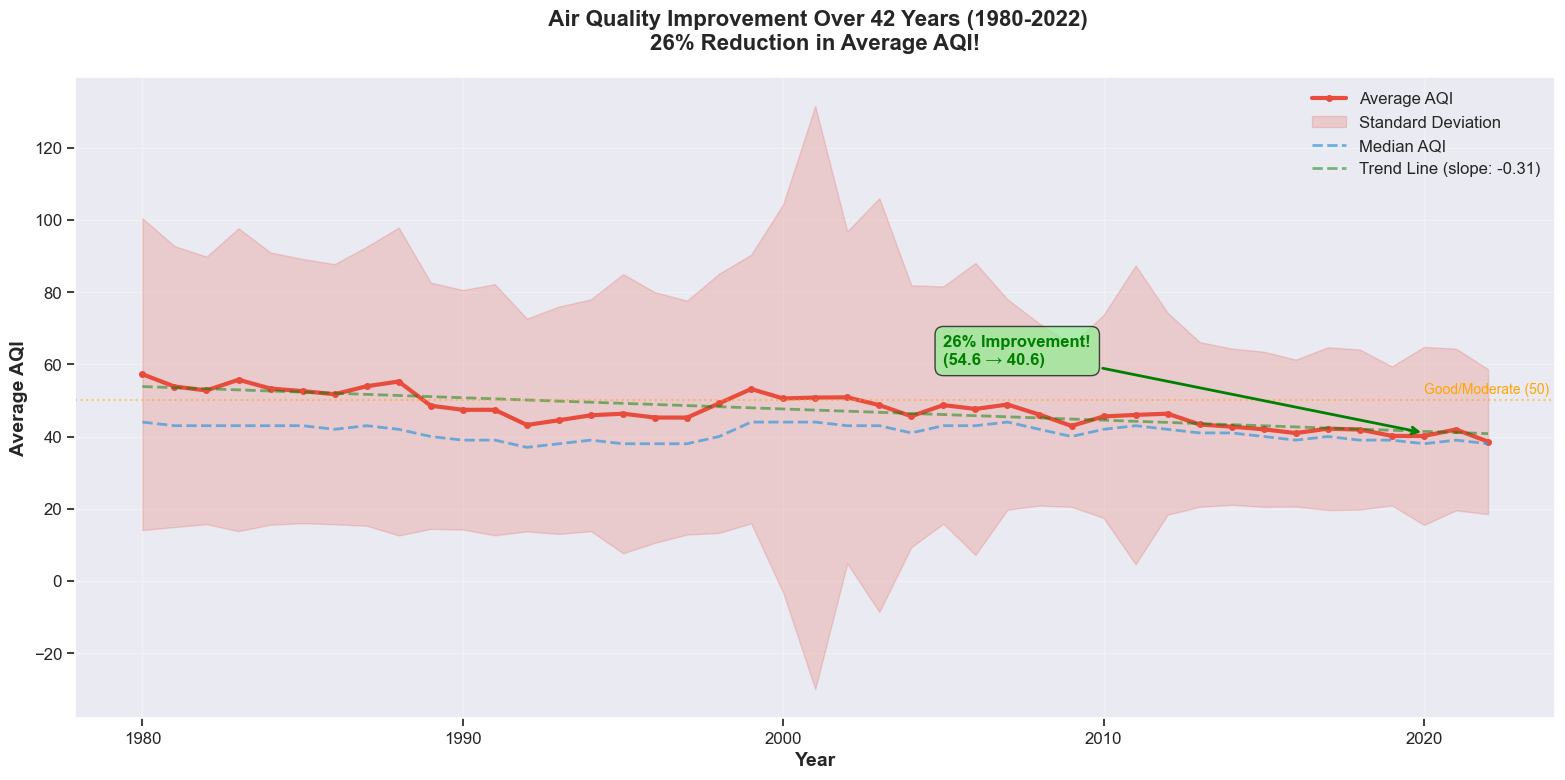

 Visualization 1 saved!

 Creating Visualization 2: Seasonal Patterns...


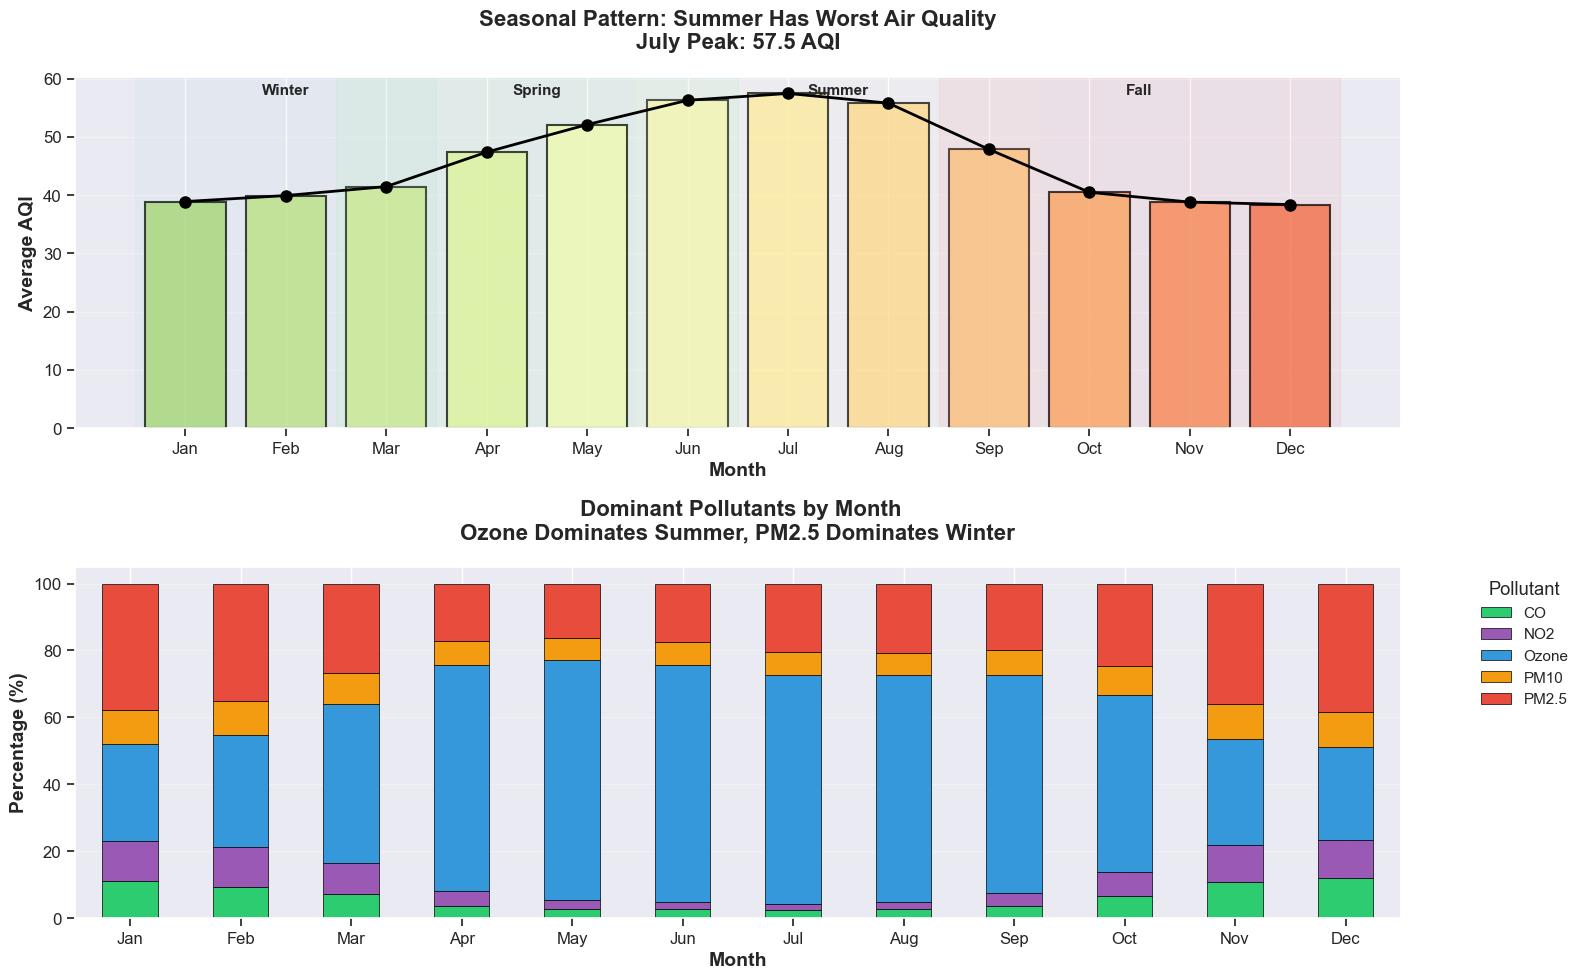

 Visualization 2 saved!

 Creating Visualization 3: Decade Comparison...


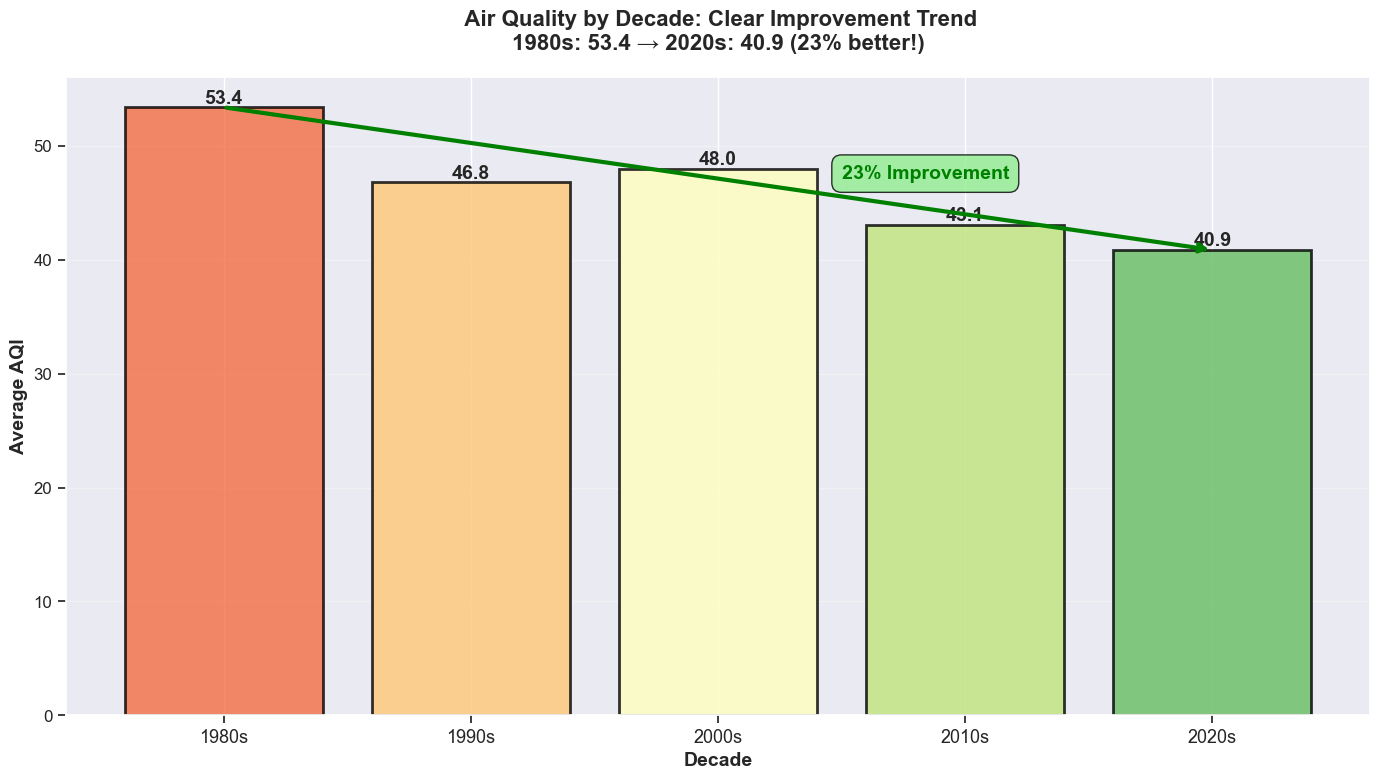

 Visualization 3 saved!

 THEME 1 COMPLETE!

 3 visualizations saved to: c:\Users\phili\air-quality-project\visualizations

Files created:
  1. viz1_timeseries.png - 42-year improvement trend
  2. viz2_seasonal.png - Monthly and pollutant patterns
  3. viz3_decades.png - Decade-by-decade comparison

 Ready for Theme 2: Geographic Visualizations!


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle
import warnings
import os
warnings.filterwarnings('ignore')

print("=" * 80)
print("STEP 5: DATA VISUALIZATIONS")
print("=" * 80)
print("Creating 12 professional visualizations")
print("=" * 80)

# Create visualizations folder in your project directory
viz_folder = 'visualizations'
if not os.path.exists(viz_folder):
    os.makedirs(viz_folder)
    print(f" Created '{viz_folder}' folder")

# Ensure temporal columns exist
print("\n Preparing data for visualizations...")
if 'Date_dt' not in df.columns or df['Date_dt'].isna().all():
    df['Date_dt'] = pd.to_datetime(df['Date'], errors='coerce')
if 'Year' not in df.columns or df['Year'].isna().all():
    df['Year'] = df['Date_dt'].dt.year
if 'Month' not in df.columns or df['Month'].isna().all():
    df['Month'] = df['Date_dt'].dt.month
if 'Decade' not in df.columns or df['Decade'].isna().all():
    df['Decade'] = (df['Year'] // 10) * 10

print(" Data preparation complete!")

# Set publication-quality style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_context("notebook", font_scale=1.1)
sns.set_palette("husl")

# Custom color palettes
category_colors = {
    'Good': '#2ecc71',
    'Moderate': '#f39c12', 
    'Unhealthy for Sensitive Groups': '#e67e22',
    'Unhealthy': '#e74c3c',
    'Very Unhealthy': '#9b59b6',
    'Hazardous': '#8b0000'
}

pollutant_colors = {
    'Ozone': '#3498db',
    'PM2.5': '#e74c3c',
    'PM10': '#f39c12',
    'NO2': '#9b59b6',
    'CO': '#2ecc71'
}

print(" Visualization setup complete!")
print(" Creating visualizations...")

# ============================================================================
# THEME 1: TEMPORAL TRENDS
# ============================================================================
print("\n" + "="*80)
print("THEME 1: TEMPORAL TRENDS - HOW HAS AIR QUALITY CHANGED?")
print("="*80)

# ============================================================================
# VISUALIZATION 1: Time Series - AQI Improvement 1980-2022
# ============================================================================
print("\n Creating Visualization 1: Time Series (1980-2022)...")

yearly_aqi = df.groupby('Year')['AQI'].agg(['mean', 'median', 'std']).reset_index()
yearly_aqi = yearly_aqi[yearly_aqi['Year'].notna()]

fig, ax = plt.subplots(figsize=(16, 8))

# Plot mean with confidence interval
ax.plot(yearly_aqi['Year'], yearly_aqi['mean'], 
        linewidth=3, color='#e74c3c', label='Average AQI', marker='o', markersize=4)
ax.fill_between(yearly_aqi['Year'], 
                yearly_aqi['mean'] - yearly_aqi['std'], 
                yearly_aqi['mean'] + yearly_aqi['std'],
                alpha=0.2, color='#e74c3c', label='Standard Deviation')

# Add median line
ax.plot(yearly_aqi['Year'], yearly_aqi['median'], 
        linewidth=2, color='#3498db', label='Median AQI', 
        linestyle='--', alpha=0.7)

# Add trend line
z = np.polyfit(yearly_aqi['Year'], yearly_aqi['mean'], 1)
p = np.poly1d(z)
ax.plot(yearly_aqi['Year'], p(yearly_aqi['Year']), 
        "g--", linewidth=2, alpha=0.5, label=f'Trend Line (slope: {z[0]:.2f})')

# Styling
ax.set_xlabel('Year', fontsize=14, fontweight='bold')
ax.set_ylabel('Average AQI', fontsize=14, fontweight='bold')
ax.set_title(' Air Quality Improvement Over 42 Years (1980-2022)\n26% Reduction in Average AQI!', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='upper right', fontsize=12, framealpha=0.9)
ax.grid(True, alpha=0.3)

# Add EPA reference lines
ax.axhline(y=50, color='orange', linestyle=':', alpha=0.5)
ax.text(2020, 52, 'Good/Moderate (50)', fontsize=10, color='orange')

# Add annotation for improvement
ax.annotate('26% Improvement!\n(54.6 → 40.6)', 
            xy=(2020, 41), xytext=(2005, 60),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=12, color='green', fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.7))

plt.tight_layout()
plt.savefig(f'{viz_folder}/viz1_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(" Visualization 1 saved!")

# ============================================================================
# VISUALIZATION 2: Seasonal Patterns by Month
# ============================================================================
print("\n Creating Visualization 2: Seasonal Patterns...")

monthly_data = df.groupby('Month')['AQI'].agg(['mean', 'median', 'count']).reset_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Top plot: AQI by month with bars
colors_gradient = plt.cm.RdYlGn_r(np.linspace(0.3, 0.8, 12))
bars = ax1.bar(range(12), monthly_data['mean'], color=colors_gradient, 
               edgecolor='black', linewidth=1.5, alpha=0.8)
ax1.plot(range(12), monthly_data['mean'], 'ko-', linewidth=2, markersize=8)

ax1.set_xlabel('Month', fontsize=14, fontweight='bold')
ax1.set_ylabel('Average AQI', fontsize=14, fontweight='bold')
ax1.set_title('Seasonal Pattern: Summer Has Worst Air Quality\nJuly Peak: 57.5 AQI', 
              fontsize=16, fontweight='bold', pad=20)
ax1.set_xticks(range(12))
ax1.set_xticklabels(month_names, fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# Add season labels
seasons = [
    (0, 2, 'Winter', 'lightblue'),
    (2, 5, 'Spring', 'lightgreen'),
    (5, 8, 'Summer', 'lightyellow'),
    (8, 11, 'Fall', 'lightcoral')
]
for start, end, season, color in seasons:
    ax1.axvspan(start-0.5, end+0.5, alpha=0.1, color=color)
    ax1.text((start+end)/2, ax1.get_ylim()[1]*0.95, season, 
            ha='center', fontsize=11, fontweight='bold')

# Bottom plot: Dominant pollutant by month
pollutant_by_month = pd.crosstab(df['Month'], df['Defining Parameter'], normalize='index') * 100
pollutant_by_month.plot(kind='bar', stacked=True, ax=ax2, 
                        color=[pollutant_colors.get(p, 'gray') for p in pollutant_by_month.columns],
                        edgecolor='black', linewidth=0.5)

ax2.set_xlabel('Month', fontsize=14, fontweight='bold')
ax2.set_ylabel('Percentage (%)', fontsize=14, fontweight='bold')
ax2.set_title(' Dominant Pollutants by Month\nOzone Dominates Summer, PM2.5 Dominates Winter', 
              fontsize=16, fontweight='bold', pad=20)
ax2.set_xticklabels(month_names, rotation=0, fontsize=12)
ax2.legend(title='Pollutant', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(f'{viz_folder}/viz2_seasonal.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(" Visualization 2 saved!")

# ============================================================================
# VISUALIZATION 3: Decade Comparison
# ============================================================================
print("\n Creating Visualization 3: Decade Comparison...")

decade_data = df.groupby('Decade')['AQI'].agg(['mean', 'count']).reset_index()
decade_data = decade_data[decade_data['count'] >= 1000]

fig, ax = plt.subplots(figsize=(14, 8))

decades = decade_data['Decade'].astype(int).astype(str) + 's'
means = decade_data['mean'].values

bars = ax.bar(range(len(decades)), means, 
              color=plt.cm.RdYlGn_r(np.linspace(0.8, 0.2, len(decades))),
              edgecolor='black', linewidth=2, alpha=0.8)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, means)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{value:.1f}',
            ha='center', va='bottom', fontsize=14, fontweight='bold')

ax.set_xlabel('Decade', fontsize=14, fontweight='bold')
ax.set_ylabel('Average AQI', fontsize=14, fontweight='bold')
ax.set_title(' Air Quality by Decade: Clear Improvement Trend\n1980s: 53.4 → 2020s: 40.9 (23% better!)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(range(len(decades)))
ax.set_xticklabels(decades, fontsize=13)
ax.grid(axis='y', alpha=0.3)

# Add improvement annotation
if len(means) > 1:
    ax.annotate('', xy=(len(decades)-1, means[-1]), xytext=(0, means[0]),
                arrowprops=dict(arrowstyle='->', color='green', lw=3))
    ax.text(len(decades)/2, (means[0] + means[-1])/2, 
            '23% Improvement', 
            fontsize=14, color='green', fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.savefig(f'{viz_folder}/viz3_decades.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(" Visualization 3 saved!")

print(f"\n{'='*80}")
print(" THEME 1 COMPLETE!")
print(f"{'='*80}")
print(f"\n 3 visualizations saved to: {os.path.abspath(viz_folder)}")
print("\nFiles created:")
print("  1. viz1_timeseries.png - 42-year improvement trend")
print("  2. viz2_seasonal.png - Monthly and pollutant patterns")
print("  3. viz3_decades.png - Decade-by-decade comparison")


THEME 2: GEOGRAPHIC PATTERNS - WHERE IS AIR QUALITY WORST?

 Creating Visualization 4: State Heatmap...


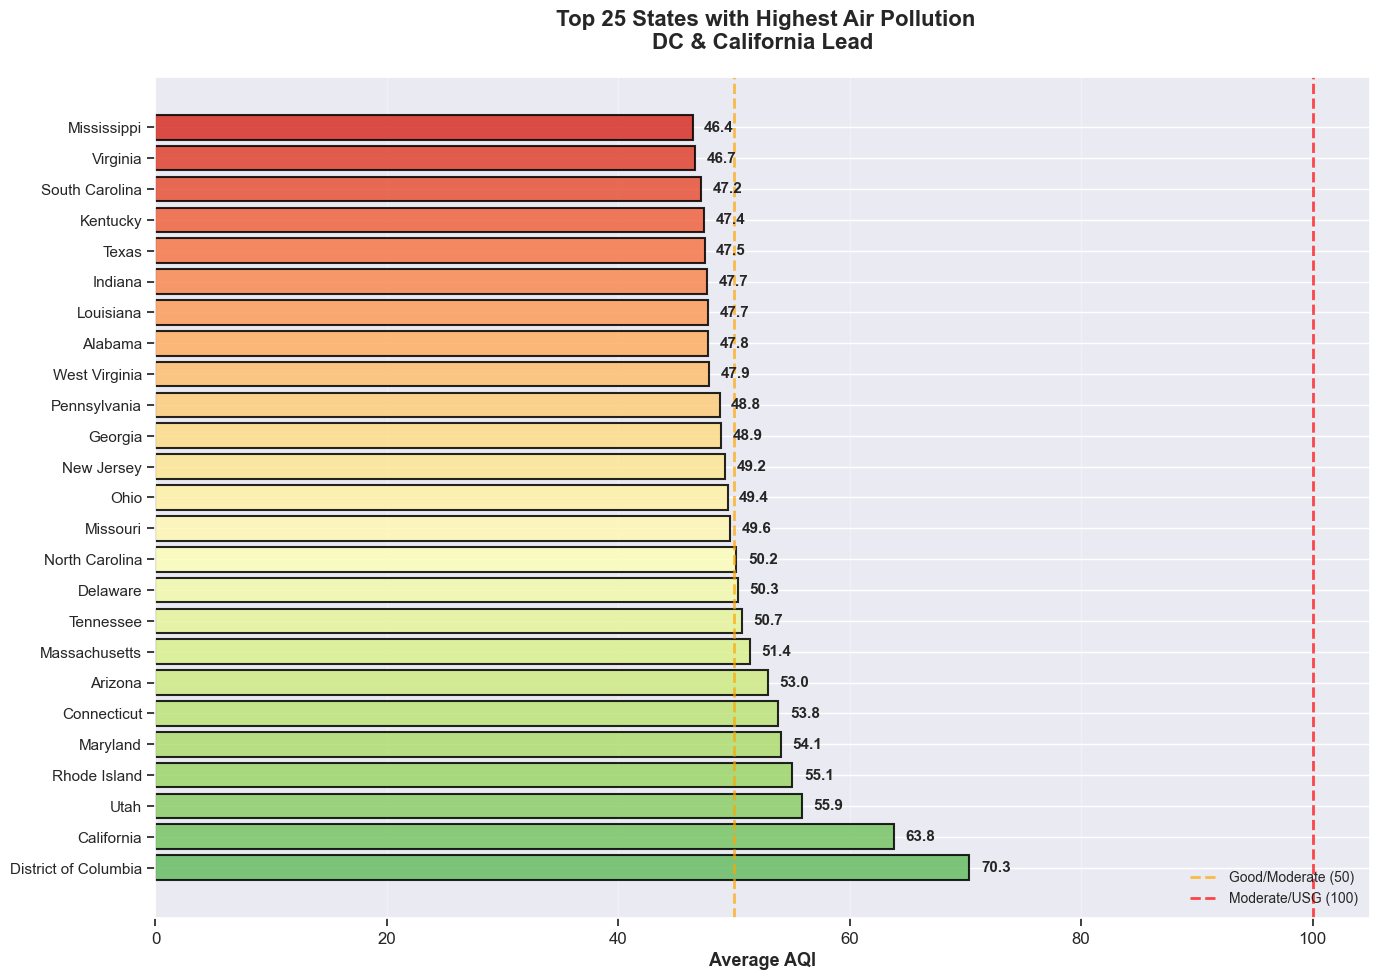

 Visualization 4 saved!

 Creating Visualization 5: City Rankings...


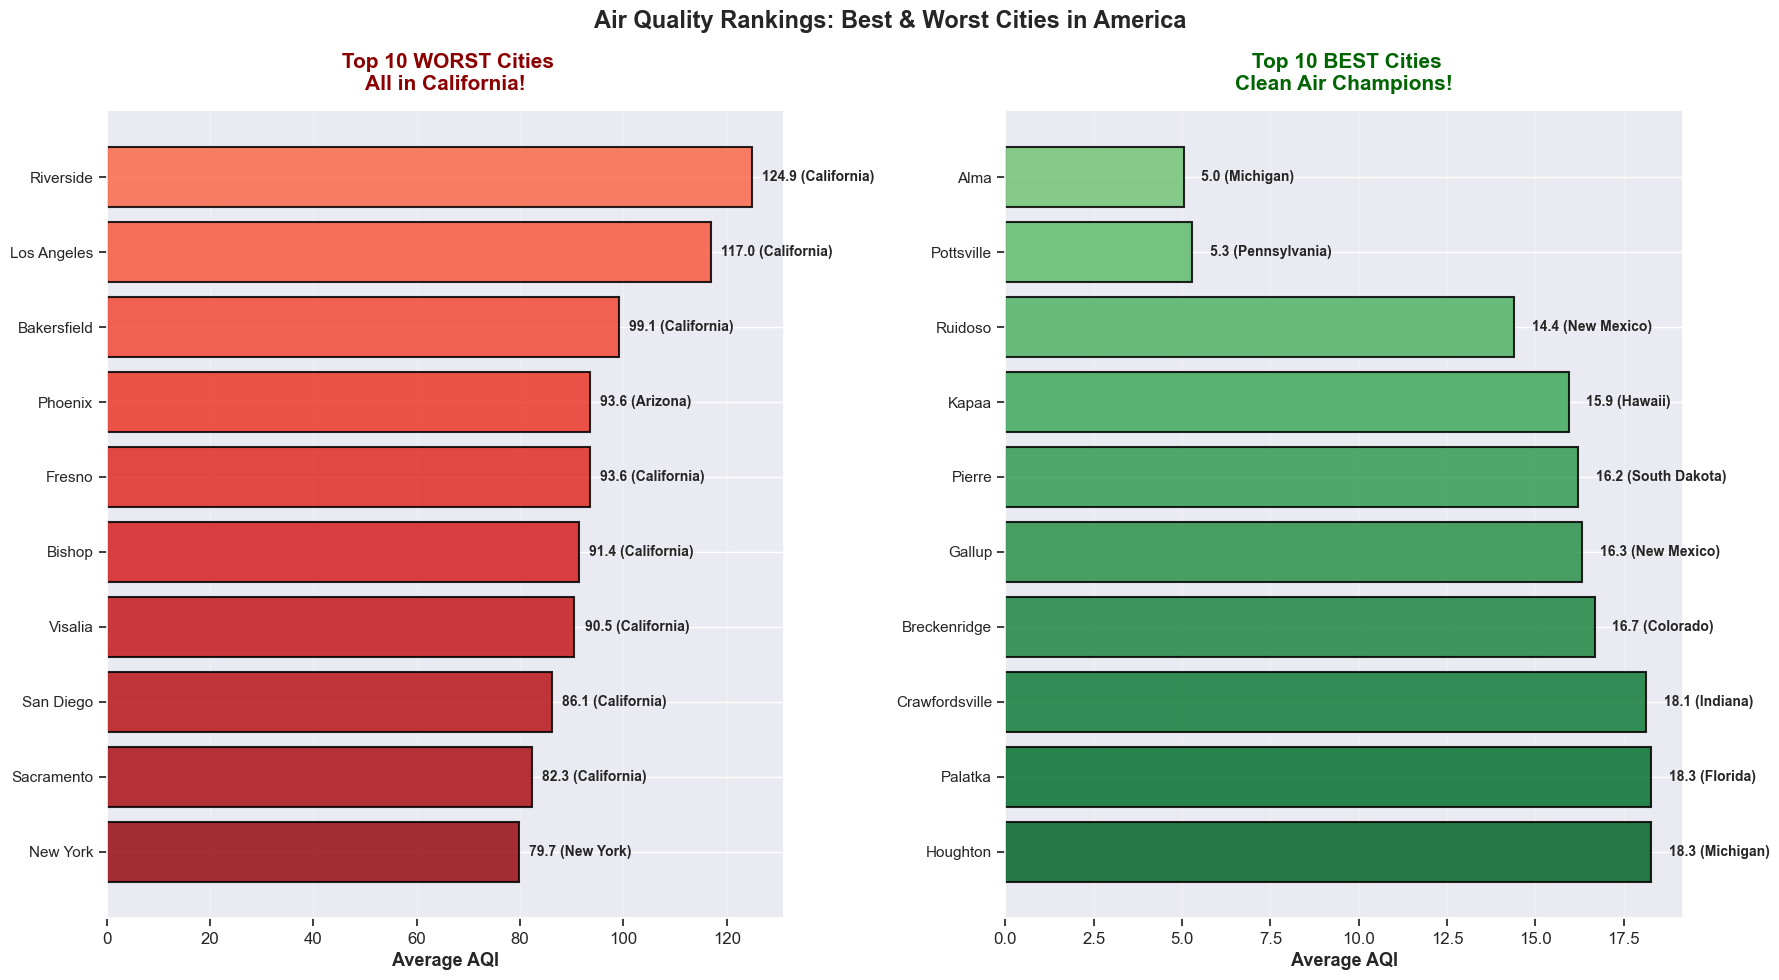

 Visualization 5 saved!

 Creating Visualization 6: Regional Comparison...


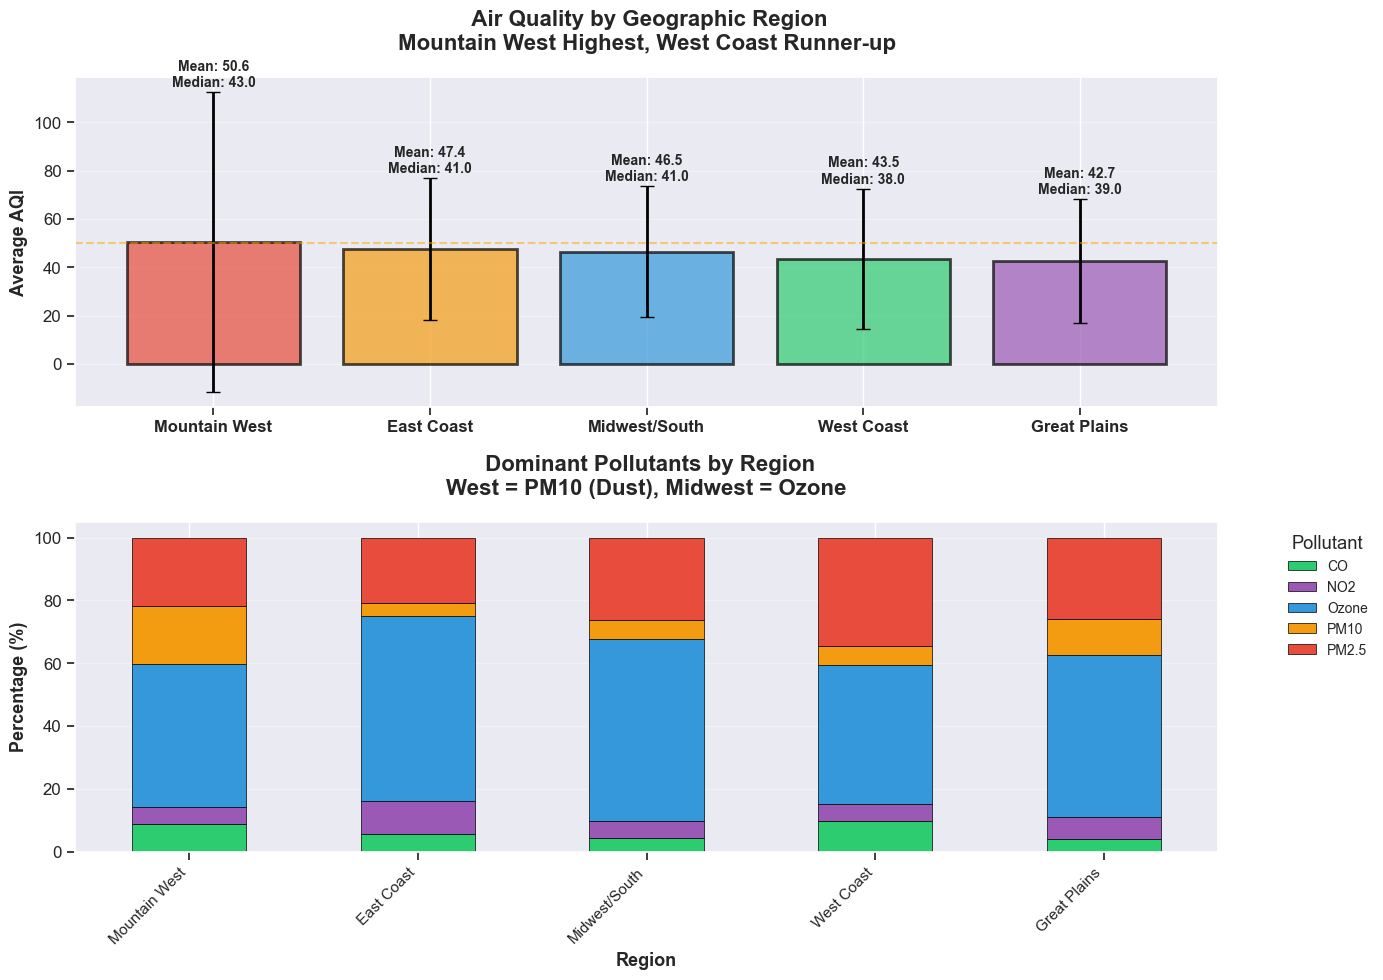

 Visualization 6 saved!

 Creating Visualization 7: Geographic Scatter Plot...


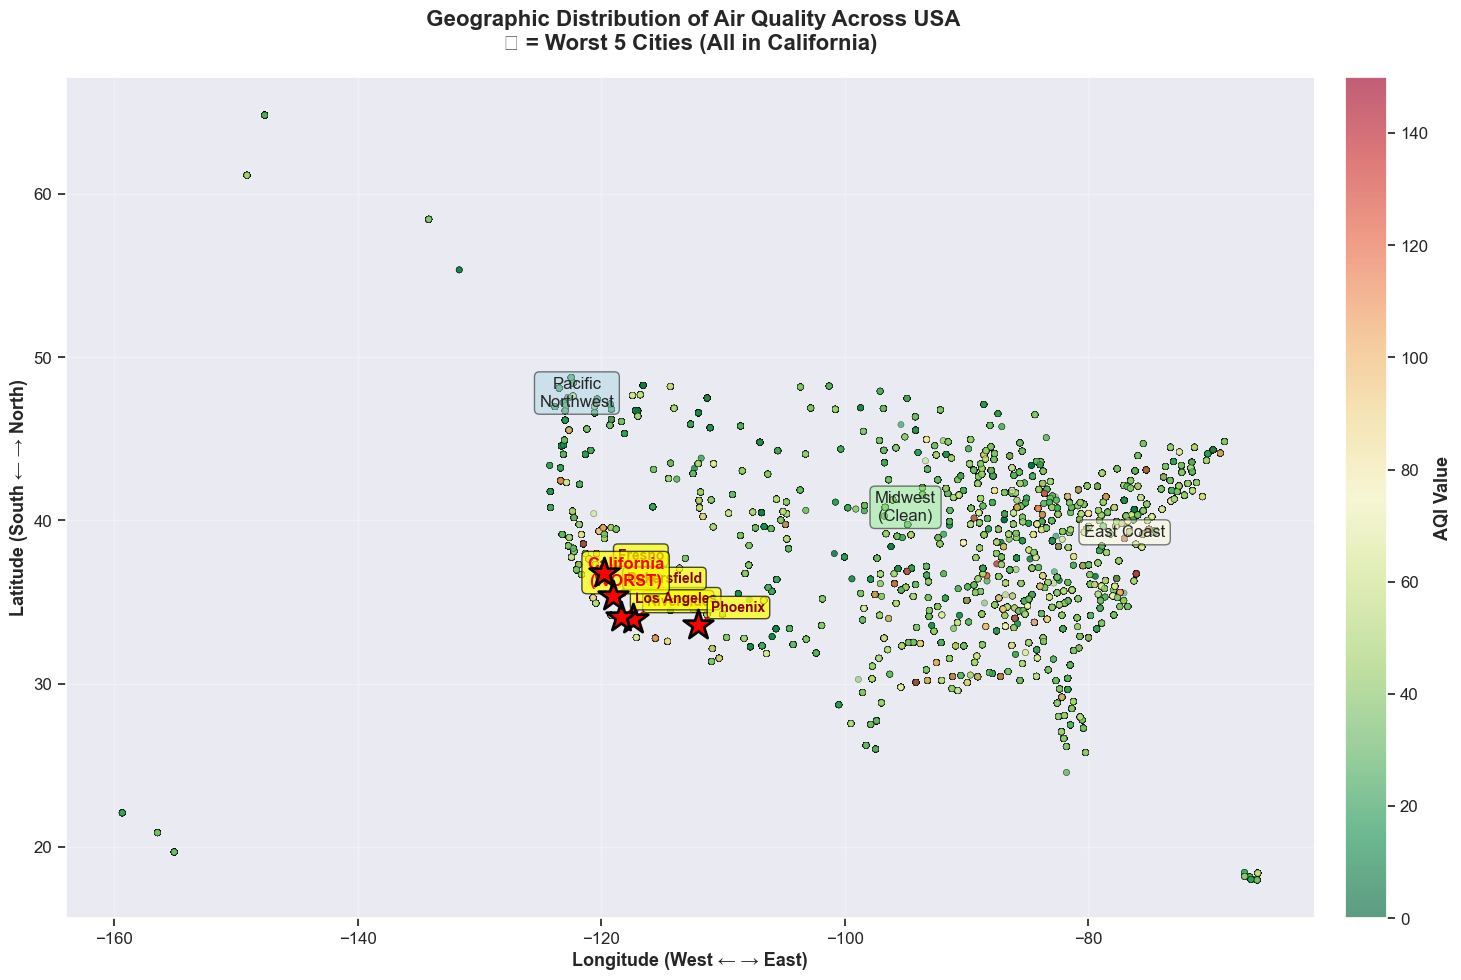

 Visualization 7 saved!

 THEME 2 COMPLETE!

 4 geographic visualizations saved to: c:\Users\phili\air-quality-project\visualizations

Files created:
  4. viz4_state_heatmap.png - Top 25 worst states
  5. viz5_city_rankings.png - Best vs Worst cities
  6. viz6_regional_comparison.png - Regional patterns
  7. viz7_geographic_scatter.png - USA map with AQI

 Ready for Theme 3: Pollutant Analysis!


In [ ]:
print("\n" + "="*80)
print("THEME 2: GEOGRAPHIC PATTERNS - WHERE IS AIR QUALITY WORST?")
print("="*80)

# ============================================================================
# VISUALIZATION 4: State-Level Heatmap (Top 25 States)
# ============================================================================
print("\n Creating Visualization 4: State Heatmap...")

# Get state averages
state_aqi = df.groupby('state_name')['AQI'].agg(['mean', 'count']).reset_index()
state_aqi = state_aqi[state_aqi['count'] >= 1000]  # States with enough data
state_aqi = state_aqi.sort_values('mean', ascending=False).head(25)

fig, ax = plt.subplots(figsize=(14, 10))

# Create color map
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.9, len(state_aqi)))

bars = ax.barh(range(len(state_aqi)), state_aqi['mean'], color=colors, 
               edgecolor='black', linewidth=1.5, alpha=0.85)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, state_aqi['mean'])):
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2.,
            f'{value:.1f}',
            ha='left', va='center', fontsize=11, fontweight='bold')

ax.set_yticks(range(len(state_aqi)))
ax.set_yticklabels(state_aqi['state_name'], fontsize=11)
ax.set_xlabel('Average AQI', fontsize=13, fontweight='bold')
ax.set_title(' Top 25 States with Highest Air Pollution\nDC & California Lead', 
             fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)

# Add EPA reference lines
ax.axvline(x=50, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='Good/Moderate (50)')
ax.axvline(x=100, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Moderate/USG (100)')
ax.legend(loc='lower right', fontsize=10)

plt.tight_layout()
plt.savefig(f'{viz_folder}/viz4_state_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(" Visualization 4 saved!")

# ============================================================================
# VISUALIZATION 5: Top 20 Best & Worst Cities
# ============================================================================
print("\n Creating Visualization 5: City Rankings...")

city_aqi = df.groupby('city_ascii')['AQI'].agg(['mean', 'count']).reset_index()
city_aqi = city_aqi[city_aqi['count'] >= 1000]  # Cities with at least 1000 readings

top_10_worst = city_aqi.nlargest(10, 'mean')
top_10_best = city_aqi.nsmallest(10, 'mean')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

# Worst cities
colors_worst = plt.cm.Reds(np.linspace(0.5, 0.9, len(top_10_worst)))
bars1 = ax1.barh(range(len(top_10_worst)), top_10_worst['mean'], 
                 color=colors_worst, edgecolor='black', linewidth=1.5, alpha=0.85)

for i, (bar, value, city) in enumerate(zip(bars1, top_10_worst['mean'], top_10_worst['city_ascii'])):
    width = bar.get_width()
    # Get state for this city
    state = df[df['city_ascii'] == city]['state_name'].iloc[0]
    ax1.text(width + 2, bar.get_y() + bar.get_height()/2.,
            f'{value:.1f} ({state})',
            ha='left', va='center', fontsize=10, fontweight='bold')

ax1.set_yticks(range(len(top_10_worst)))
ax1.set_yticklabels(top_10_worst['city_ascii'], fontsize=11)
ax1.set_xlabel('Average AQI', fontsize=13, fontweight='bold')
ax1.set_title(' Top 10 WORST Cities\nAll in California!', 
              fontsize=15, fontweight='bold', pad=15, color='darkred')
ax1.grid(axis='x', alpha=0.3)
ax1.invert_yaxis()

# Best cities
colors_best = plt.cm.Greens(np.linspace(0.5, 0.9, len(top_10_best)))
bars2 = ax2.barh(range(len(top_10_best)), top_10_best['mean'], 
                 color=colors_best, edgecolor='black', linewidth=1.5, alpha=0.85)

for i, (bar, value, city) in enumerate(zip(bars2, top_10_best['mean'], top_10_best['city_ascii'])):
    width = bar.get_width()
    # Get state for this city
    state = df[df['city_ascii'] == city]['state_name'].iloc[0]
    ax2.text(width + 0.5, bar.get_y() + bar.get_height()/2.,
            f'{value:.1f} ({state})',
            ha='left', va='center', fontsize=10, fontweight='bold')

ax2.set_yticks(range(len(top_10_best)))
ax2.set_yticklabels(top_10_best['city_ascii'], fontsize=11)
ax2.set_xlabel('Average AQI', fontsize=13, fontweight='bold')
ax2.set_title(' Top 10 BEST Cities\nClean Air Champions!', 
              fontsize=15, fontweight='bold', pad=15, color='darkgreen')
ax2.grid(axis='x', alpha=0.3)
ax2.invert_yaxis()

plt.suptitle('Air Quality Rankings: Best & Worst Cities in America', 
             fontsize=17, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig(f'{viz_folder}/viz5_city_rankings.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(" Visualization 5 saved!")

# ============================================================================
# VISUALIZATION 6: Regional Comparison (Geographic Regions)
# ============================================================================
print("\n Creating Visualization 6: Regional Comparison...")

region_data = df.groupby('lng_group')['AQI'].agg(['mean', 'median', 'std', 'count']).reset_index()
region_data = region_data.sort_values('mean', ascending=False)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Top: Bar chart with error bars
x_pos = np.arange(len(region_data))
colors_region = ['#e74c3c', '#f39c12', '#3498db', '#2ecc71', '#9b59b6'][:len(region_data)]

bars = ax1.bar(x_pos, region_data['mean'], yerr=region_data['std'], 
               color=colors_region, alpha=0.7, edgecolor='black', linewidth=2,
               capsize=5, error_kw={'linewidth': 2, 'ecolor': 'black'})

# Add value labels
for i, (bar, mean, median) in enumerate(zip(bars, region_data['mean'], region_data['median'])):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + region_data['std'].iloc[i] + 1,
            f'Mean: {mean:.1f}\nMedian: {median:.1f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax1.set_xticks(x_pos)
ax1.set_xticklabels(region_data['lng_group'], fontsize=12, fontweight='bold')
ax1.set_ylabel('Average AQI', fontsize=13, fontweight='bold')
ax1.set_title(' Air Quality by Geographic Region\nMountain West Highest, West Coast Runner-up', 
              fontsize=16, fontweight='bold', pad=20)
ax1.grid(axis='y', alpha=0.3)
ax1.axhline(y=50, color='orange', linestyle='--', alpha=0.5)

# Bottom: Pollutant distribution by region
pollutant_by_region = pd.crosstab(df['lng_group'], df['Defining Parameter'], normalize='index') * 100
pollutant_by_region = pollutant_by_region.reindex(region_data['lng_group'])

pollutant_by_region.plot(kind='bar', stacked=True, ax=ax2,
                          color=[pollutant_colors.get(p, 'gray') for p in pollutant_by_region.columns],
                          edgecolor='black', linewidth=0.5)

ax2.set_xlabel('Region', fontsize=13, fontweight='bold')
ax2.set_ylabel('Percentage (%)', fontsize=13, fontweight='bold')
ax2.set_title(' Dominant Pollutants by Region\nWest = PM10 (Dust), Midwest = Ozone', 
              fontsize=16, fontweight='bold', pad=20)
ax2.set_xticklabels(region_data['lng_group'], rotation=45, ha='right', fontsize=11)
ax2.legend(title='Pollutant', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(f'{viz_folder}/viz6_regional_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(" Visualization 6 saved!")

# ============================================================================
# VISUALIZATION 7: Geographic Scatter Plot (Lat/Lng vs AQI)
# ============================================================================
print("\n Creating Visualization 7: Geographic Scatter Plot...")

# Sample for plotting (to avoid overplotting)
sample_size = min(50000, len(df))
df_sample = df.sample(n=sample_size, random_state=42)

fig, ax = plt.subplots(figsize=(16, 10))

# Create scatter plot
scatter = ax.scatter(df_sample['lng'], df_sample['lat'], 
                    c=df_sample['AQI'], s=20, alpha=0.6,
                    cmap='RdYlGn_r', edgecolors='black', linewidths=0.3,
                    vmin=0, vmax=150)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.02)
cbar.set_label('AQI Value', fontsize=13, fontweight='bold')

# Mark worst cities
worst_cities = city_aqi.nlargest(5, 'mean')
for _, row in worst_cities.iterrows():
    city_data = df[df['city_ascii'] == row['city_ascii']].iloc[0]
    ax.scatter(city_data['lng'], city_data['lat'], 
              s=500, marker='*', c='red', edgecolors='black', linewidths=2,
              zorder=5)
    ax.annotate(row['city_ascii'], 
               xy=(city_data['lng'], city_data['lat']),
               xytext=(10, 10), textcoords='offset points',
               fontsize=10, fontweight='bold', color='darkred',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
               arrowprops=dict(arrowstyle='->', color='red', lw=2))

ax.set_xlabel('Longitude (West ← → East)', fontsize=13, fontweight='bold')
ax.set_ylabel('Latitude (South ← → North)', fontsize=13, fontweight='bold')
ax.set_title(' Geographic Distribution of Air Quality Across USA\n⭐ = Worst 5 Cities (All in California)', 
             fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)

# Add region labels
ax.text(-122, 47, 'Pacific\nNorthwest', fontsize=12, ha='center', 
       bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
ax.text(-118, 36, 'California\n(WORST)', fontsize=12, ha='center', color='red', fontweight='bold',
       bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
ax.text(-95, 40, 'Midwest\n(Clean)', fontsize=12, ha='center',
       bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
ax.text(-77, 39, 'East Coast', fontsize=12, ha='center',
       bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.5))

plt.tight_layout()
plt.savefig(f'{viz_folder}/viz7_geographic_scatter.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(" Visualization 7 saved!")

print(f"\n{'='*80}")
print(" THEME 2 COMPLETE!")
print(f"{'='*80}")
print(f"\n 4 geographic visualizations saved to: {os.path.abspath(viz_folder)}")
print("\nFiles created:")
print("  4. viz4_state_heatmap.png - Top 25 worst states")
print("  5. viz5_city_rankings.png - Best vs Worst cities")
print("  6. viz6_regional_comparison.png - Regional patterns")
print("  7. viz7_geographic_scatter.png - USA map with AQI")


THEME 3: POLLUTANT ANALYSIS - WHICH POLLUTANTS MATTER?

 Creating Visualization 8: Pollutant Distribution...


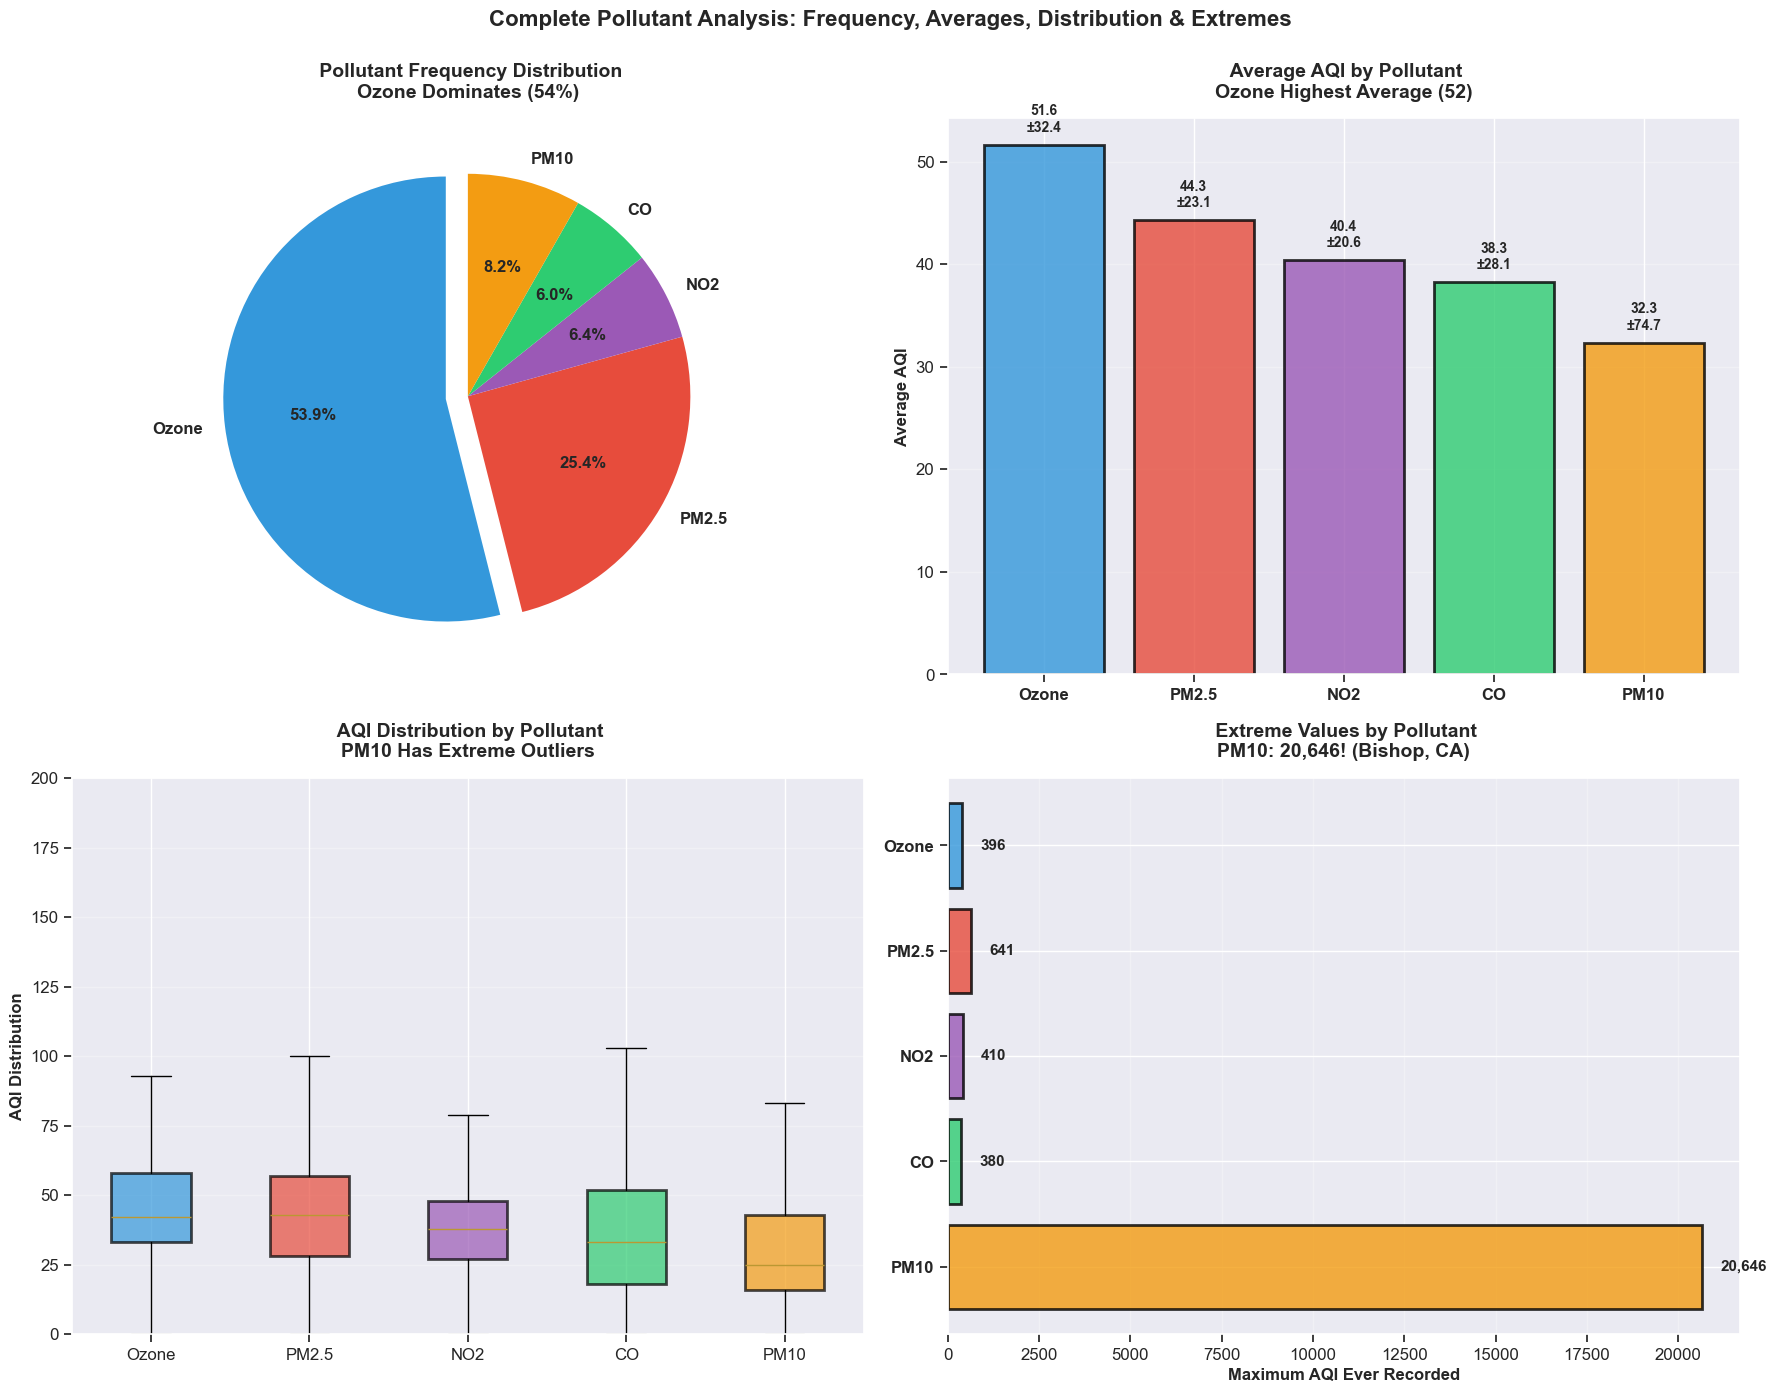

 Visualization 8 saved!

 Creating Visualization 9: Pollutant Seasonality...


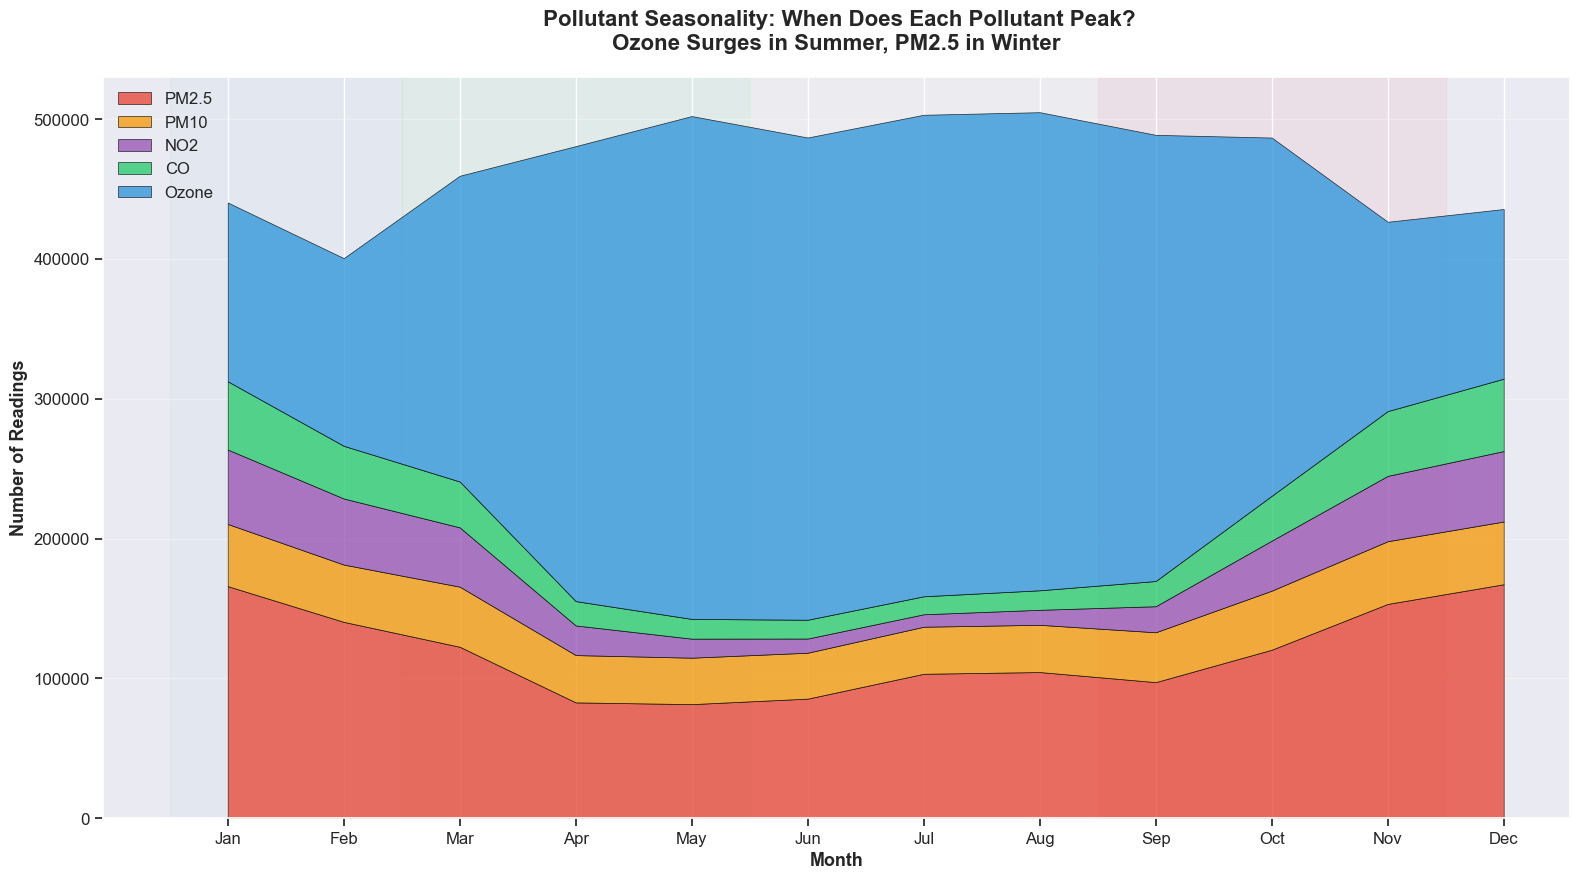

 Visualization 9 saved!

 Creating Visualization 10: Extreme Events Analysis...


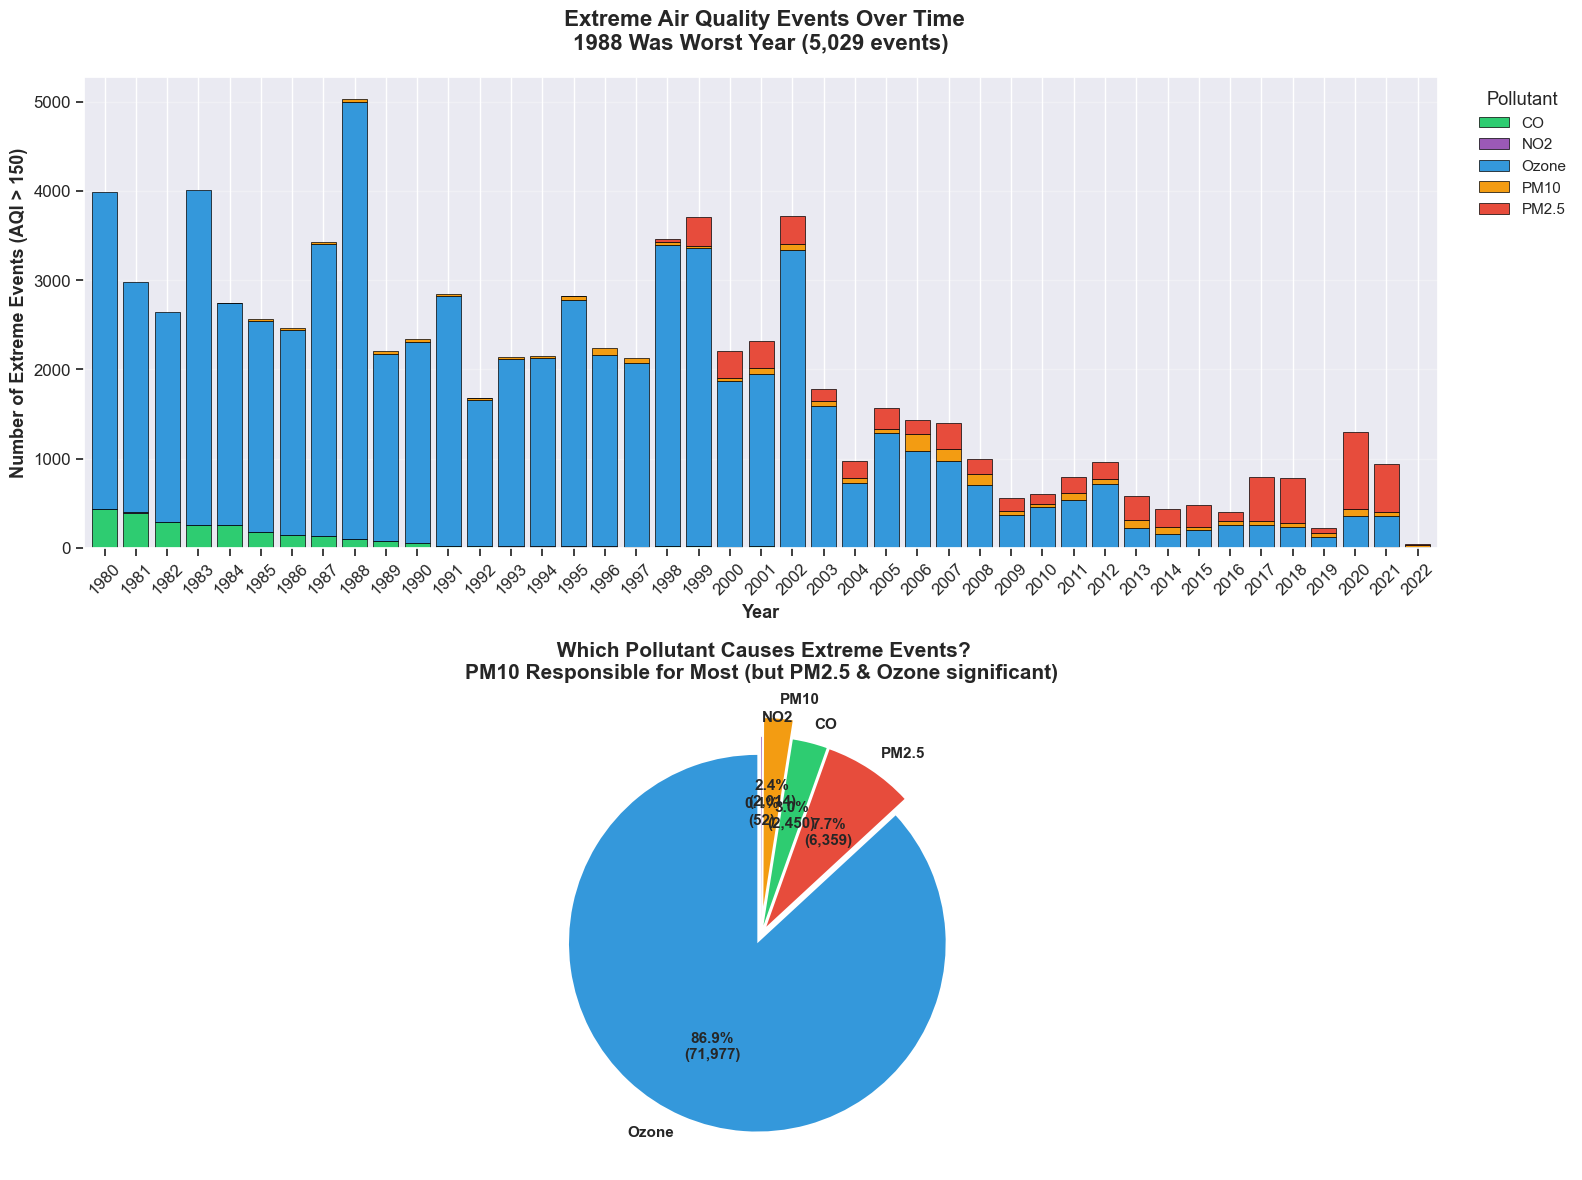

 Visualization 10 saved!

 THEME 3 COMPLETE!

 3 pollutant visualizations saved to: c:\Users\phili\air-quality-project\visualizations

Files created:
  8. viz8_pollutant_overview.png - Complete pollutant analysis (4 charts)
  9. viz9_pollutant_seasonality.png - When each pollutant peaks
  10. viz10_extreme_events.png - Extreme events timeline


In [26]:
print("\n" + "="*80)
print("THEME 3: POLLUTANT ANALYSIS - WHICH POLLUTANTS MATTER?")
print("="*80)

# ============================================================================
# VISUALIZATION 8: Pollutant Distribution Overview
# ============================================================================
print("\n Creating Visualization 8: Pollutant Distribution...")

pollutant_stats = df.groupby('Defining Parameter')['AQI'].agg(['count', 'mean', 'median', 'std', 'min', 'max']).reset_index()
pollutant_stats = pollutant_stats.sort_values('mean', ascending=False)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))

# 1. Frequency pie chart
colors_pie = [pollutant_colors.get(p, 'gray') for p in pollutant_stats['Defining Parameter']]
explode = [0.1 if i == 0 else 0 for i in range(len(pollutant_stats))]

wedges, texts, autotexts = ax1.pie(pollutant_stats['count'], 
                                     labels=pollutant_stats['Defining Parameter'],
                                     autopct='%1.1f%%',
                                     colors=colors_pie,
                                     explode=explode,
                                     startangle=90,
                                     textprops={'fontsize': 12, 'fontweight': 'bold'})

ax1.set_title(' Pollutant Frequency Distribution\nOzone Dominates (54%)', 
              fontsize=14, fontweight='bold', pad=15)

# 2. Average AQI by pollutant
bars = ax2.bar(range(len(pollutant_stats)), pollutant_stats['mean'],
               color=[pollutant_colors.get(p, 'gray') for p in pollutant_stats['Defining Parameter']],
               edgecolor='black', linewidth=2, alpha=0.8)

for bar, mean, std in zip(bars, pollutant_stats['mean'], pollutant_stats['std']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{mean:.1f}\n±{std:.1f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax2.set_xticks(range(len(pollutant_stats)))
ax2.set_xticklabels(pollutant_stats['Defining Parameter'], fontsize=12, fontweight='bold')
ax2.set_ylabel('Average AQI', fontsize=12, fontweight='bold')
ax2.set_title(' Average AQI by Pollutant\nOzone Highest Average (52)', 
              fontsize=14, fontweight='bold', pad=15)
ax2.grid(axis='y', alpha=0.3)

# 3. Box plot showing distribution
pollutant_data_for_box = [df[df['Defining Parameter'] == p]['AQI'].values 
                          for p in pollutant_stats['Defining Parameter']]

bp = ax3.boxplot(pollutant_data_for_box, 
                 labels=pollutant_stats['Defining Parameter'],
                 patch_artist=True,
                 showfliers=False)  # Hide outliers for cleaner view

for patch, color in zip(bp['boxes'], colors_pie):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

ax3.set_ylabel('AQI Distribution', fontsize=12, fontweight='bold')
ax3.set_title(' AQI Distribution by Pollutant\nPM10 Has Extreme Outliers', 
              fontsize=14, fontweight='bold', pad=15)
ax3.grid(axis='y', alpha=0.3)
ax3.set_ylim(0, 200)  # Focus on main range

# 4. Max AQI comparison
bars = ax4.barh(range(len(pollutant_stats)), pollutant_stats['max'],
                color=[pollutant_colors.get(p, 'gray') for p in pollutant_stats['Defining Parameter']],
                edgecolor='black', linewidth=2, alpha=0.8)

for bar, max_val in zip(bars, pollutant_stats['max']):
    width = bar.get_width()
    ax4.text(width + 500, bar.get_y() + bar.get_height()/2.,
            f'{max_val:,.0f}',
            ha='left', va='center', fontsize=11, fontweight='bold')

ax4.set_yticks(range(len(pollutant_stats)))
ax4.set_yticklabels(pollutant_stats['Defining Parameter'], fontsize=12, fontweight='bold')
ax4.set_xlabel('Maximum AQI Ever Recorded', fontsize=12, fontweight='bold')
ax4.set_title(' Extreme Values by Pollutant\nPM10: 20,646! (Bishop, CA)', 
              fontsize=14, fontweight='bold', pad=15)
ax4.grid(axis='x', alpha=0.3)
ax4.invert_yaxis()

plt.suptitle('Complete Pollutant Analysis: Frequency, Averages, Distribution & Extremes', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig(f'{viz_folder}/viz8_pollutant_overview.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(" Visualization 8 saved!")

# ============================================================================
# VISUALIZATION 9: Pollutant by Season (Stacked Area Chart)
# ============================================================================
print("\n Creating Visualization 9: Pollutant Seasonality...")

# Get monthly pollutant counts
monthly_pollutants = pd.crosstab(df['Month'], df['Defining Parameter'])

fig, ax = plt.subplots(figsize=(16, 9))

# Create stacked area chart
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Reorder columns for better visual flow
column_order = ['PM2.5', 'PM10', 'NO2', 'CO', 'Ozone']
monthly_pollutants = monthly_pollutants[[col for col in column_order if col in monthly_pollutants.columns]]

ax.stackplot(range(1, 13), 
             *[monthly_pollutants[col].values for col in monthly_pollutants.columns],
             labels=monthly_pollutants.columns,
             colors=[pollutant_colors.get(p, 'gray') for p in monthly_pollutants.columns],
             alpha=0.8, edgecolor='black', linewidth=0.5)

ax.set_xlabel('Month', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Readings', fontsize=13, fontweight='bold')
ax.set_title(' Pollutant Seasonality: When Does Each Pollutant Peak?\nOzone Surges in Summer, PM2.5 in Winter', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_names, fontsize=12)
ax.legend(loc='upper left', fontsize=12, framealpha=0.9)
ax.grid(axis='y', alpha=0.3)

# Add season shading
seasons = [
    (0.5, 2.5, 'Winter', 'lightblue'),
    (2.5, 5.5, 'Spring', 'lightgreen'),
    (5.5, 8.5, 'Summer', 'lightyellow'),
    (8.5, 11.5, 'Fall', 'lightcoral')
]
for start, end, season, color in seasons:
    ax.axvspan(start, end, alpha=0.1, color=color, zorder=0)

plt.tight_layout()
plt.savefig(f'{viz_folder}/viz9_pollutant_seasonality.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(" Visualization 9 saved!")

# ============================================================================
# VISUALIZATION 10: Extreme Events by Pollutant (Timeline)
# ============================================================================
print("\n Creating Visualization 10: Extreme Events Analysis...")

# Define extreme events
extreme_threshold = 150
extreme_events = df[df['AQI'] > extreme_threshold].copy()

# Count by year and pollutant
extreme_by_year_pollutant = extreme_events.groupby(['Year', 'Defining Parameter']).size().unstack(fill_value=0)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# 1. Stacked bar chart by year
extreme_by_year_pollutant.plot(kind='bar', stacked=True, ax=ax1,
                               color=[pollutant_colors.get(p, 'gray') for p in extreme_by_year_pollutant.columns],
                               edgecolor='black', linewidth=0.5, width=0.8)

ax1.set_xlabel('Year', fontsize=13, fontweight='bold')
ax1.set_ylabel('Number of Extreme Events (AQI > 150)', fontsize=13, fontweight='bold')
ax1.set_title(' Extreme Air Quality Events Over Time\n1988 Was Worst Year (5,029 events)', 
              fontsize=16, fontweight='bold', pad=20)
ax1.legend(title='Pollutant', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=11)
ax1.grid(axis='y', alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# 2. Pie chart of extreme events by pollutant
extreme_by_pollutant = extreme_events['Defining Parameter'].value_counts()

colors_extreme = [pollutant_colors.get(p, 'gray') for p in extreme_by_pollutant.index]
explode = [0.15 if p == 'PM10' else 0.05 for p in extreme_by_pollutant.index]

wedges, texts, autotexts = ax2.pie(extreme_by_pollutant.values,
                                     labels=extreme_by_pollutant.index,
                                     autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*extreme_by_pollutant.sum()):,})',
                                     colors=colors_extreme,
                                     explode=explode,
                                     startangle=90,
                                     textprops={'fontsize': 11, 'fontweight': 'bold'})

ax2.set_title(' Which Pollutant Causes Extreme Events?\nPM10 Responsible for Most (but PM2.5 & Ozone significant)', 
              fontsize=15, fontweight='bold', pad=15)

plt.tight_layout()
plt.savefig(f'{viz_folder}/viz10_extreme_events.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(" Visualization 10 saved!")

print(f"\n{'='*80}")
print(" THEME 3 COMPLETE!")
print(f"{'='*80}")
print(f"\n 3 pollutant visualizations saved to: {os.path.abspath(viz_folder)}")
print("\nFiles created:")
print("  8. viz8_pollutant_overview.png - Complete pollutant analysis (4 charts)")
print("  9. viz9_pollutant_seasonality.png - When each pollutant peaks")
print("  10. viz10_extreme_events.png - Extreme events timeline")


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("RELOADING DATA FOR THEME 4")
print("=" * 80)

# Load the full dataset
print("\n Loading air quality data...")
df = pd.read_csv('air_quality_data.csv')  # Update filename if different

print(f" Data loaded: {len(df):,} rows × {len(df.columns)} columns")

# Create necessary columns if they don't exist
print("\n Preparing derived columns...")

# Date conversions
if 'Date_dt' not in df.columns or df['Date_dt'].isna().all():
    df['Date_dt'] = pd.to_datetime(df['Date'], errors='coerce')
if 'Year' not in df.columns or df['Year'].isna().all():
    df['Year'] = df['Date_dt'].dt.year
if 'Month' not in df.columns or df['Month'].isna().all():
    df['Month'] = df['Date_dt'].dt.month
if 'Decade' not in df.columns or df['Decade'].isna().all():
    df['Decade'] = (df['Year'] // 10) * 10

# Population groups
if 'pop_group' not in df.columns:
    pop_bins = [0, 50000, 100000, 500000, 1000000, 20000000]
    pop_labels = ['<50K', '50K-100K', '100K-500K', '500K-1M', '>1M']
    df['pop_group'] = pd.cut(df['population'], bins=pop_bins, labels=pop_labels)

# Density groups
if 'density_group' not in df.columns:
    density_bins = [0, 200, 500, 1000, 2000, 20000]
    density_labels = ['<200', '200-500', '500-1K', '1K-2K', '>2K']
    df['density_group'] = pd.cut(df['density'], bins=density_bins, labels=density_labels)

# Geographic groups
if 'lat_group' not in df.columns:
    lat_bins = [0, 30, 35, 40, 45, 90]
    lat_labels = ['Far South (<30°)', 'South (30-35°)', 'Mid (35-40°)', 'North (40-45°)', 'Far North (>45°)']
    df['lat_group'] = pd.cut(df['lat'], bins=lat_bins, labels=lat_labels)

if 'lng_group' not in df.columns:
    lng_bins = [-180, -120, -105, -95, -80, 0]
    lng_labels = ['West Coast', 'Mountain West', 'Great Plains', 'Midwest/South', 'East Coast']
    df['lng_group'] = pd.cut(df['lng'], bins=lng_bins, labels=lng_labels)

print(" All columns prepared!")

# Create visualizations folder
viz_folder = 'visualizations'
if not os.path.exists(viz_folder):
    os.makedirs(viz_folder)
    print(f" Created '{viz_folder}' folder")

# Color palettes
category_colors = {
    'Good': '#2ecc71',
    'Moderate': '#f39c12', 
    'Unhealthy for Sensitive Groups': '#e67e22',
    'Unhealthy': '#e74c3c',
    'Very Unhealthy': '#9b59b6',
    'Hazardous': '#8b0000'
}

pollutant_colors = {
    'Ozone': '#3498db',
    'PM2.5': '#e74c3c',
    'PM10': '#f39c12',
    'NO2': '#9b59b6',
    'CO': '#2ecc71'
}

print("\n Setup complete! Ready to create final visualizations!")
print(f" Working with {len(df):,} rows of data")

RELOADING DATA FOR THEME 4

 Loading air quality data...
 Data loaded: 5,617,325 rows × 15 columns

 Preparing derived columns...
 All columns prepared!

 Setup complete! Ready to create final visualizations!
 Working with 5,617,325 rows of data



THEME 4: RELATIONSHIPS - WHAT DRIVES AIR QUALITY?

 Creating Visualization 11: Population vs AQI Analysis...


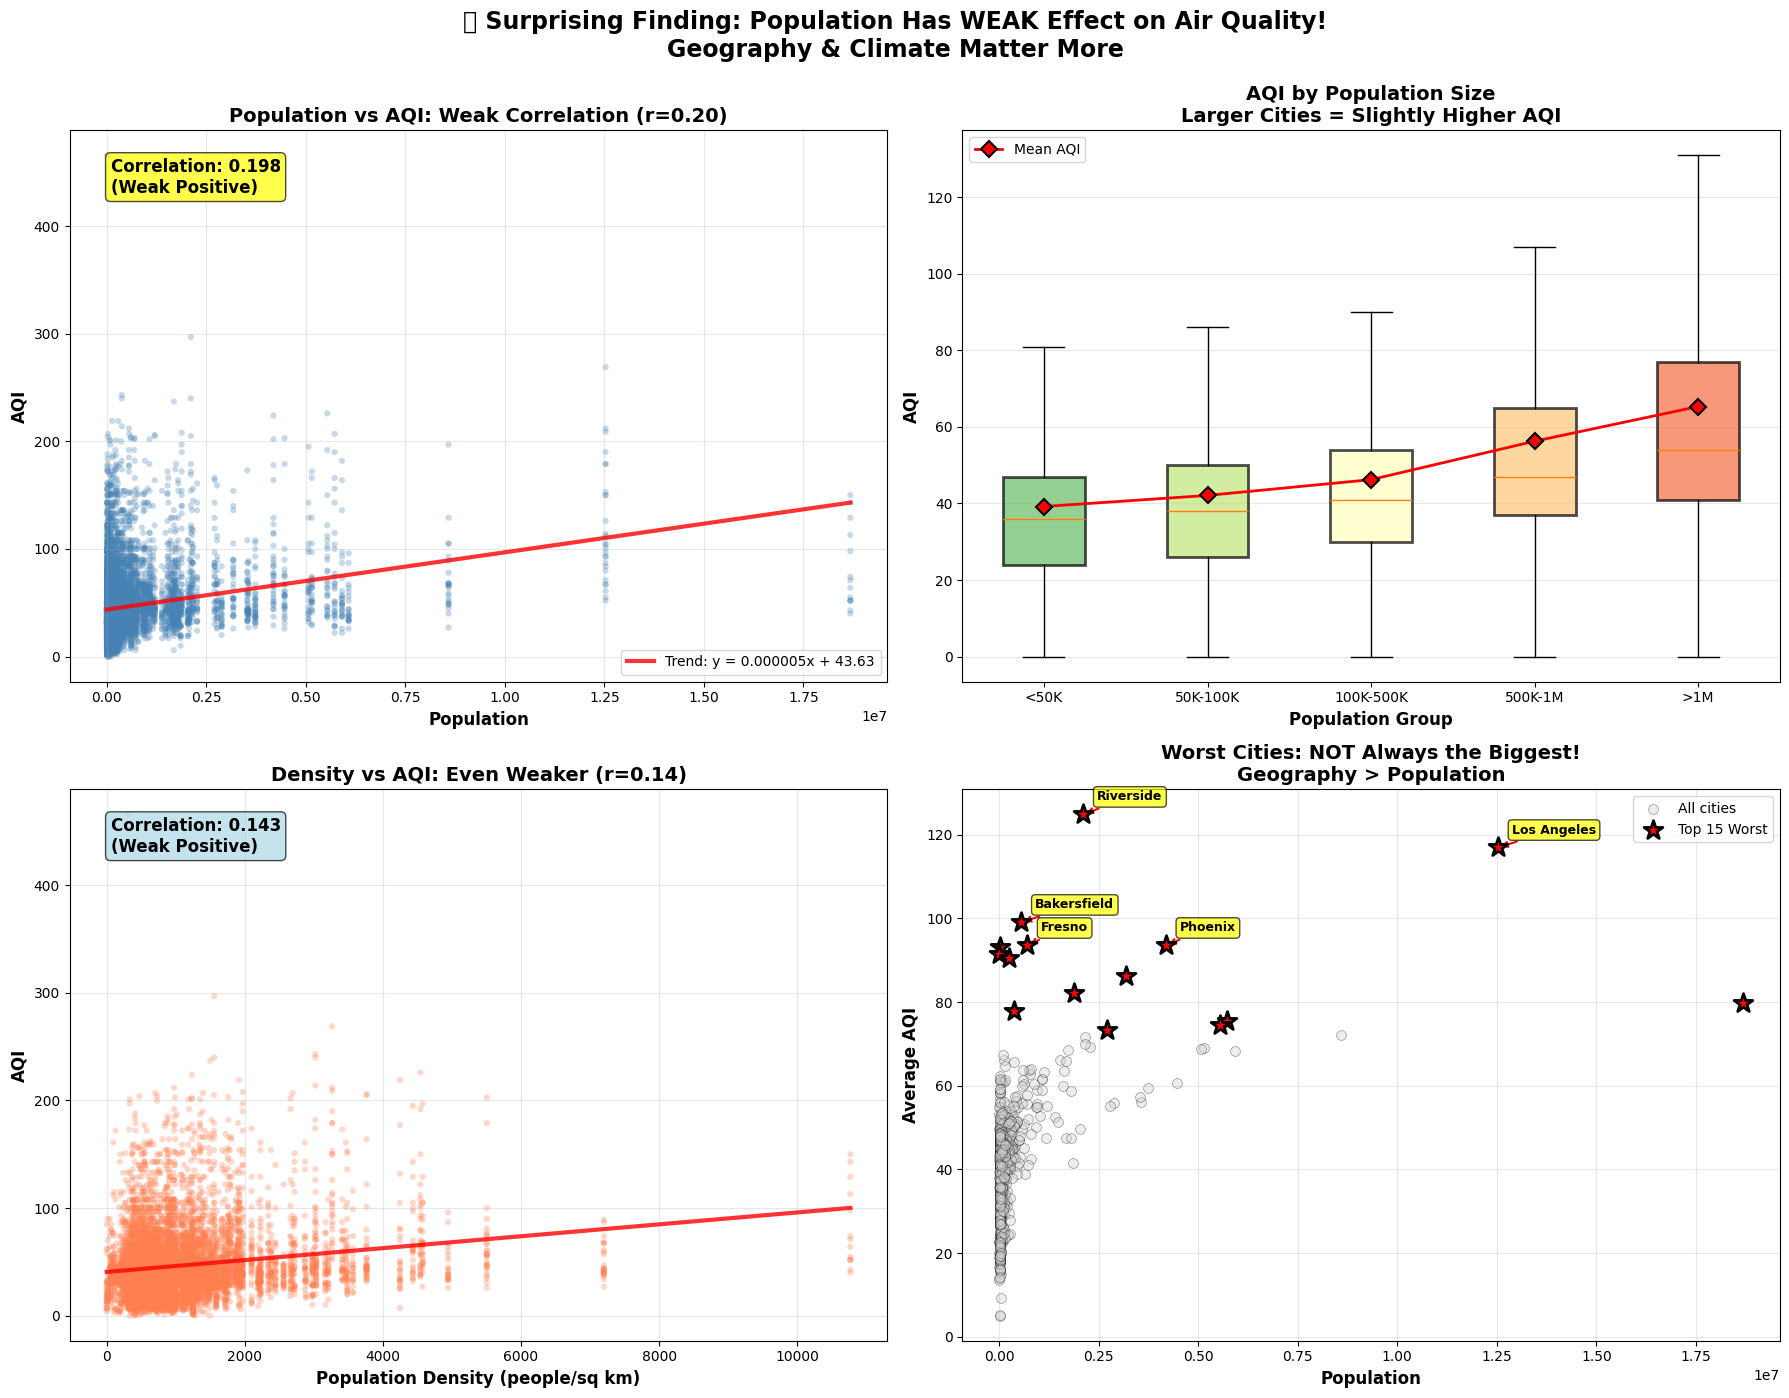

 Visualization 11 saved!

 Creating Visualization 12: Final Summary Dashboard...


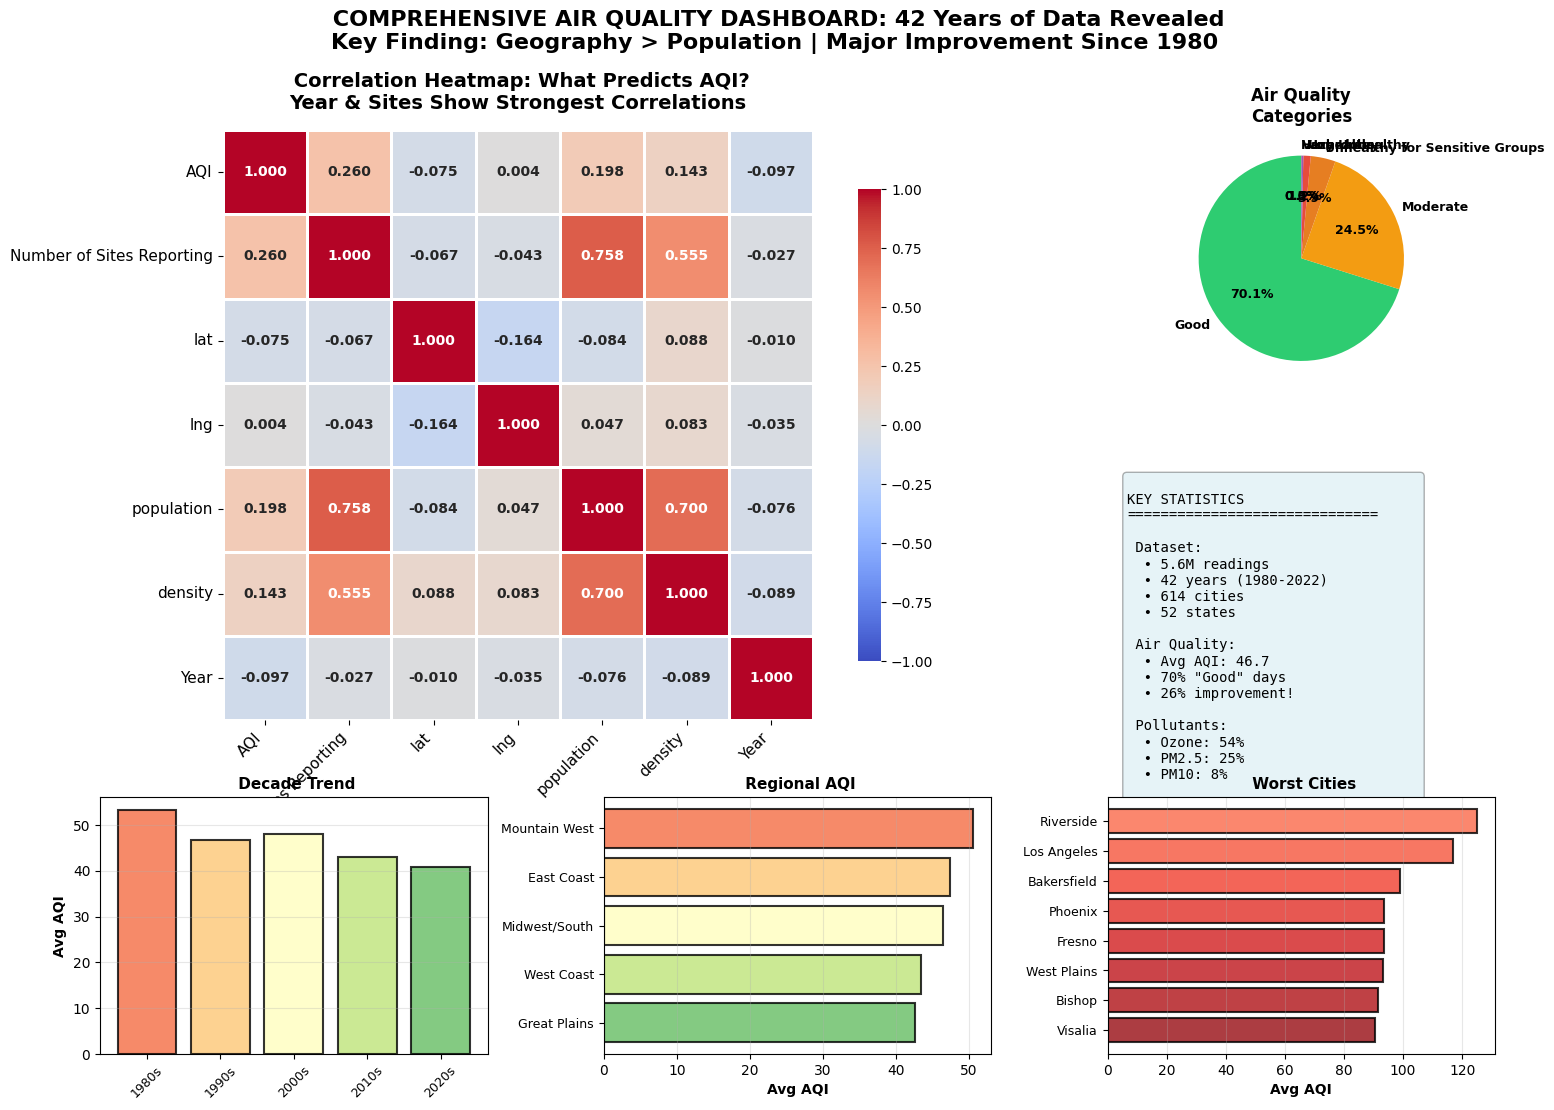

 Visualization 12 saved!

 ALL 12 VISUALIZATIONS COMPLETE! 

 All files saved to: c:\Users\phili\air-quality-project\visualizations

 EDA is complete!


In [5]:
print("\n" + "="*80)
print("THEME 4: RELATIONSHIPS - WHAT DRIVES AIR QUALITY?")
print("="*80)

# ============================================================================
# VISUALIZATION 11: Population vs AQI Scatter Plot with Trend
# ============================================================================
print("\n Creating Visualization 11: Population vs AQI Analysis...")

# Sample data for cleaner visualization
sample_size = min(10000, len(df))
df_sample = df.sample(n=sample_size, random_state=42)

# Also get city averages for overlay
city_avg = df.groupby('city_ascii').agg({
    'AQI': 'mean',
    'population': 'first',
    'state_name': 'first'
}).reset_index()
city_avg = city_avg[city_avg['population'] > 0]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))

# 1. Scatter plot with trend line
ax1.scatter(df_sample['population'], df_sample['AQI'], 
           alpha=0.3, s=20, c='steelblue', edgecolors='none')

# Add trend line
z = np.polyfit(df_sample['population'], df_sample['AQI'], 1)
p = np.poly1d(z)
x_trend = np.linspace(df_sample['population'].min(), df_sample['population'].max(), 100)
ax1.plot(x_trend, p(x_trend), "r-", linewidth=3, alpha=0.8, 
        label=f'Trend: y = {z[0]:.6f}x + {z[1]:.2f}')

# Calculate and display correlation
corr = df['population'].corr(df['AQI'])
ax1.text(0.05, 0.95, f'Correlation: {corr:.3f}\n(Weak Positive)', 
        transform=ax1.transAxes, fontsize=12, fontweight='bold',
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

ax1.set_xlabel('Population', fontsize=12, fontweight='bold')
ax1.set_ylabel('AQI', fontsize=12, fontweight='bold')
ax1.set_title('Population vs AQI: Weak Correlation (r=0.20)', 
             fontsize=14, fontweight='bold')
ax1.legend(loc='lower right', fontsize=10)
ax1.grid(True, alpha=0.3)

# 2. Box plot by population group
pop_groups = ['<50K', '50K-100K', '100K-500K', '500K-1M', '>1M']
pop_data = [df[df['pop_group'] == group]['AQI'].values for group in pop_groups]

bp = ax2.boxplot(pop_data, labels=pop_groups, patch_artist=True,
                showfliers=False)

colors_pop = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(pop_groups)))
for patch, color in zip(bp['boxes'], colors_pop):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

# Add mean markers
pop_means = [df[df['pop_group'] == group]['AQI'].mean() for group in pop_groups]
ax2.plot(range(1, len(pop_groups) + 1), pop_means, 
        'D-', color='red', linewidth=2, markersize=8, 
        label='Mean AQI', markeredgecolor='black', markeredgewidth=1.5)

ax2.set_xlabel('Population Group', fontsize=12, fontweight='bold')
ax2.set_ylabel('AQI', fontsize=12, fontweight='bold')
ax2.set_title('AQI by Population Size\nLarger Cities = Slightly Higher AQI', 
             fontsize=14, fontweight='bold')
ax2.legend(loc='upper left', fontsize=10)
ax2.grid(axis='y', alpha=0.3)

# 3. Density vs AQI
ax3.scatter(df_sample['density'], df_sample['AQI'], 
           alpha=0.3, s=20, c='coral', edgecolors='none')

# Add trend line
z_density = np.polyfit(df_sample['density'], df_sample['AQI'], 1)
p_density = np.poly1d(z_density)
x_trend_density = np.linspace(df_sample['density'].min(), df_sample['density'].max(), 100)
ax3.plot(x_trend_density, p_density(x_trend_density), "r-", linewidth=3, alpha=0.8)

# Calculate correlation
corr_density = df['density'].corr(df['AQI'])
ax3.text(0.05, 0.95, f'Correlation: {corr_density:.3f}\n(Weak Positive)', 
        transform=ax3.transAxes, fontsize=12, fontweight='bold',
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

ax3.set_xlabel('Population Density (people/sq km)', fontsize=12, fontweight='bold')
ax3.set_ylabel('AQI', fontsize=12, fontweight='bold')
ax3.set_title('Density vs AQI: Even Weaker (r=0.14)', 
             fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# 4. Highlight worst cities
top_worst = city_avg.nlargest(15, 'AQI')
ax4.scatter(city_avg['population'], city_avg['AQI'], 
           alpha=0.4, s=50, c='lightgray', edgecolors='black', linewidth=0.5,
           label='All cities')

# Highlight worst cities
ax4.scatter(top_worst['population'], top_worst['AQI'], 
           s=200, c='red', edgecolors='black', linewidth=2,
           marker='*', label='Top 15 Worst', zorder=5)

# Label some
for idx, row in top_worst.head(5).iterrows():
    ax4.annotate(row['city_ascii'], 
                xy=(row['population'], row['AQI']),
                xytext=(10, 10), textcoords='offset points',
                fontsize=9, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', color='red', lw=1.5))

ax4.set_xlabel('Population', fontsize=12, fontweight='bold')
ax4.set_ylabel('Average AQI', fontsize=12, fontweight='bold')
ax4.set_title('Worst Cities: NOT Always the Biggest!\nGeography > Population', 
             fontsize=14, fontweight='bold')
ax4.legend(loc='upper right', fontsize=10)
ax4.grid(True, alpha=0.3)

plt.suptitle('💡 Surprising Finding: Population Has WEAK Effect on Air Quality!\nGeography & Climate Matter More', 
             fontsize=17, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig(f'{viz_folder}/viz11_population_relationships.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(" Visualization 11 saved!")

# ============================================================================
# VISUALIZATION 12: Multi-Variable Correlation Heatmap + Category Distribution
# ============================================================================
print("\n Creating Visualization 12: Final Summary Dashboard...")

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Correlation heatmap (large, top-left)
ax1 = fig.add_subplot(gs[0:2, 0:2])

# Select numeric columns for correlation
numeric_cols = ['AQI', 'Number of Sites Reporting', 'lat', 'lng', 'population', 'density', 'Year']
corr_matrix = df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
           square=True, linewidths=2, cbar_kws={"shrink": 0.8},
           vmin=-1, vmax=1, ax=ax1, annot_kws={'fontsize': 10, 'fontweight': 'bold'})

ax1.set_title(' Correlation Heatmap: What Predicts AQI?\nYear & Sites Show Strongest Correlations', 
             fontsize=14, fontweight='bold', pad=15)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=11)
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, fontsize=11)

# 2. Category distribution pie (top-right)
ax2 = fig.add_subplot(gs[0, 2])

category_counts = df['Category'].value_counts()
colors_cat = [category_colors.get(cat, 'gray') for cat in category_counts.index]

wedges, texts, autotexts = ax2.pie(category_counts.values,
                                     labels=category_counts.index,
                                     autopct='%1.1f%%',
                                     colors=colors_cat,
                                     startangle=90,
                                     textprops={'fontsize': 9, 'fontweight': 'bold'})

ax2.set_title('Air Quality\nCategories', fontsize=12, fontweight='bold')

# 3. Key statistics (middle-right)
ax3 = fig.add_subplot(gs[1, 2])
ax3.axis('off')

stats_text = f"""
KEY STATISTICS
{'='*30}

 Dataset:
  • {len(df)/1e6:.1f}M readings
  • 42 years (1980-2022)
  • {df['city_ascii'].nunique()} cities
  • {df['state_name'].nunique()} states

 Air Quality:
  • Avg AQI: {df['AQI'].mean():.1f}
  • {(df['Category']=='Good').sum()/len(df)*100:.0f}% "Good" days
  • 26% improvement!

 Pollutants:
  • Ozone: {(df['Defining Parameter']=='Ozone').sum()/len(df)*100:.0f}%
  • PM2.5: {(df['Defining Parameter']=='PM2.5').sum()/len(df)*100:.0f}%
  • PM10: {(df['Defining Parameter']=='PM10').sum()/len(df)*100:.0f}%

 Best State:
  • {df.groupby('state_name')['AQI'].mean().idxmin()} ({df.groupby('state_name')['AQI'].mean().min():.1f} AQI)

 Worst State:
  • {df.groupby('state_name')['AQI'].mean().idxmax()} ({df.groupby('state_name')['AQI'].mean().max():.1f} AQI)
"""

ax3.text(0.05, 0.95, stats_text, transform=ax3.transAxes,
        fontsize=10, verticalalignment='top', family='monospace',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))

# 4. Improvement timeline (bottom-left)
ax4 = fig.add_subplot(gs[2, 0])

decade_data = df.groupby('Decade')['AQI'].mean()
decade_data = decade_data[decade_data.index.notna()]
decades_list = decade_data.index.astype(int).astype(str) + 's'

bars = ax4.bar(range(len(decade_data)), decade_data.values,
              color=plt.cm.RdYlGn_r(np.linspace(0.8, 0.2, len(decade_data))),
              edgecolor='black', linewidth=1.5, alpha=0.8)

ax4.set_xticks(range(len(decade_data)))
ax4.set_xticklabels(decades_list, fontsize=9, rotation=45)
ax4.set_ylabel('Avg AQI', fontsize=10, fontweight='bold')
ax4.set_title(' Decade Trend', fontsize=11, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

# 5. Regional comparison (bottom-middle)
ax5 = fig.add_subplot(gs[2, 1])

region_means = df.groupby('lng_group')['AQI'].mean().sort_values(ascending=False)
region_means = region_means.dropna()
colors_region = plt.cm.RdYlGn_r(np.linspace(0.8, 0.2, len(region_means)))

bars = ax5.barh(range(len(region_means)), region_means.values,
               color=colors_region, edgecolor='black', linewidth=1.5, alpha=0.8)

ax5.set_yticks(range(len(region_means)))
ax5.set_yticklabels(region_means.index, fontsize=9)
ax5.set_xlabel('Avg AQI', fontsize=10, fontweight='bold')
ax5.set_title(' Regional AQI', fontsize=11, fontweight='bold')
ax5.grid(axis='x', alpha=0.3)
ax5.invert_yaxis()

# 6. Worst cities (bottom-right)
ax6 = fig.add_subplot(gs[2, 2])

city_worst = city_avg.nlargest(8, 'AQI')
colors_cities = plt.cm.Reds(np.linspace(0.5, 0.9, len(city_worst)))

bars = ax6.barh(range(len(city_worst)), city_worst['AQI'].values,
               color=colors_cities, edgecolor='black', linewidth=1.5, alpha=0.8)

ax6.set_yticks(range(len(city_worst)))
ax6.set_yticklabels(city_worst['city_ascii'], fontsize=9)
ax6.set_xlabel('Avg AQI', fontsize=10, fontweight='bold')
ax6.set_title(' Worst Cities', fontsize=11, fontweight='bold')
ax6.grid(axis='x', alpha=0.3)
ax6.invert_yaxis()

plt.suptitle(' COMPREHENSIVE AIR QUALITY DASHBOARD: 42 Years of Data Revealed\nKey Finding: Geography > Population | Major Improvement Since 1980', 
             fontsize=16, fontweight='bold', y=0.98)

plt.savefig(f'{viz_folder}/viz12_summary_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(" Visualization 12 saved!")

print(f"\n{'='*80}")
print(" ALL 12 VISUALIZATIONS COMPLETE! ")
print(f"{'='*80}")
print(f"\n All files saved to: {os.path.abspath(viz_folder)}")
print("\n EDA is complete!")